# Projet Data Science HMIN232 - 2020/2021
Ce projet a pour but de proposer des modèles de classification supervisée d'assertions faites
par des figures politiques selon leur valeur de véracité, ou autrement dit, de proposer une
approche de fact-checking automatique.

Groupe : 

## **Installation**

In [2]:
# Importation des différentes librairies, classes et fonctions utilespour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns

# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize 

 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *


## les Données

Suite a une analyse des donnés communiqués dans le fichier csv ,nous avons décidé d'utiliser la platforme afin de télécharger les données contenant les valeur de véracités,tout en profitant du fait que ces dérniére sont plus propres que c'elles du fichier csv.



## 1 Importation des donnés


 le data frame est composé de 24454 lignes et 14 colonnes
 le data frame est composé de 24452 lignes et 14 colonnes
2    10000
1    10000
3     4452
Name: truthRating, dtype: int64


id  \
0      http://data.gesis.org/claimskg/claim_review/36...   
1      http://data.gesis.org/claimskg/claim_review/e6...   
2      http://data.gesis.org/claimskg/claim_review/e0...   
3      http://data.gesis.org/claimskg/claim_review/48...   
4      http://data.gesis.org/claimskg/claim_review/80...   
...                                                  ...   
24449  http://data.gesis.org/claimskg/claim_review/41...   
24450  http://data.gesis.org/claimskg/claim_review/9e...   
24451  http://data.gesis.org/claimskg/claim_review/1a...   
24452  http://data.gesis.org/claimskg/claim_review/28...   
24453  http://data.gesis.org/claimskg/claim_review/e4...   

                                                    text        date  \
0      'There will be no public funding for abortion ...  2010-03-21   
1      Central Health 'is the only hospital district ...  2011-03-15   
2      Says most of Perry's chiefs of staff have been...  2010-08-14   
3      Says 'as Co-Chair of the Joint Ways & Means Co...  2012-09-28   
4      Says Gary Farmer’s claim that he 'received an ...  2016-07-08   
...                                                  ...         ...   
24449  'The city that I was mayor of was 50 percent L...  2018-06-07   
24450  A set of images show a congenital anomaly that...     Unknown   
24451  'You see 34 people (are) murdered every single...  2012-12-23   
24452  'White men have committed more mass shootings ...  2017-10-02   
24453  Under President Obama’s health-care reforms, t...  2013-12-05   

      truthRating ratingName           author  \
0               3       TRUE      Bart Stupak   
1               3       TRUE  Wayne Christian   
2               3       TRUE       Bill White   
3               3       TRUE       Mary Nolan   
4               3       TRUE      Jim Waldman   
...           ...        ...              ...   
24449           2    MIXTURE     Lou Barletta   
24450           2    MIXTURE          Unknown   
24451           2    MIXTURE      Cory Booker   
24452           2    MIXTURE         Newsweek   
24453           2    MIXTURE      Ron Johnson   

                                                headline  \
0      Stupak revises abortion stance on health care ...   
1      State Rep. Wayne Christian says Central Health...   
2      Bill White says most of Gov. Rick Perry's chie...   
3      Did Mary Nolan secure funding for Milwaukie br...   
4      Florida Senate candidate never actually receiv...   
...                                                  ...   
24449  Hazleton wasn’t half-Latino when Lou Barletta ...   
24450            Is This a Real Hand With Eight Fingers?   
24451  Cory Booker says 34 Americans are killed by gu...   
24452  Are white males responsible for more mass shoo...   
24453  Under Obamacare, health insurance premiums hav...   

                                    named_entities_claim  \
0      Abortion rights,Barack Obama,Bart Stupak,Ben N...   
1      Austin American-Statesman,Harris County Hospit...   
2      AT&T,Bill Clements,Bill White,Bracewell & Giul...   
3      Carolyn Tomei,Dave Hunt,Fetsch,Jeff Merkley,Ka...   
4      Gary Farmer,Gwyndolen Clarke-Reed,Jim Waldman,...   
...                                                  ...   
24449  Barletta,Bob Casey,Fox Business Network,Hazlet...   
24450  American Society for Surgery of the Hand,Bilas...   
24451  ABC,Centers for Disease Control and Prevention...   
24452  2015 San Bernardino shooting,Aurora, Colo,Foll...   
24453  2008 presidential campaign,Affordable Care Act...   

                      named_entities_article  \
0                                   abortion   
1                                        NaN   
2                                        NaN   
3      Portland-Milwaukie Light Rail project   
4                                Gary Farmer   
...                                      ...   
24449                                 Latino   
24450                                    NaN   
24451

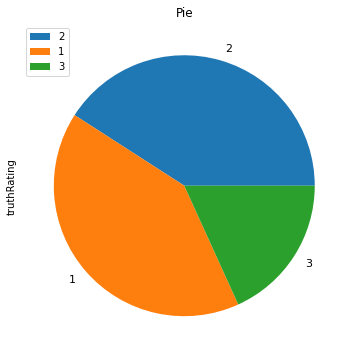

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv (r'Rendu/DATASETS/data_sets.csv')
row, col = df.shape
print(f" le data frame est composé de {row} lignes et {col} colonnes")
# suppression des lignes qui contiennes les attribus 
df = df[df['id']!= 'id']
row1, col1 = df.shape
print(f" le data frame est composé de {row1} lignes et {col1} colonnes")
df.head()

df["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)
print(df["truthRating"].value_counts())

display(df)

In [4]:
# 2 Pré traitement des données 
#explications des étapes de prés traitemens 

### 2.1 Creation d'une classe de prés traitements 



Fonction de préTraitement 

In [5]:
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import inflect
import unicodedata

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres 
               transformdigit=False,# transformer les nombres en lettrres 
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False,# lematisation des termes 
               remove_non_ascii=False,# suppriimer les caractéres_non_ascii
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]
    # transformert les nombres en lettres 
    if transformdigit:
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
                
        words = new_words
        
        
        
    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
    
    # suppression des caractéres non ascii
    if remove_non_ascii:
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        words = new_words 
    
    
    
    return sentence   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit
        self.transformdigit=transformdigit
        self.remove_non_ascii=remove_non_ascii

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit,
                            transformdigit=self.transformdigit,
                            remove_non_ascii=self.remove_non_ascii) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit,
            'transformdigit':self.transformdigit,
            'remove_non_ascii':self.remove_non_ascii
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


### 2.2 Sépartion en diffenrents data frame selon les classes 

In [7]:
# vrai / faux 
dfVF= df.copy()
dfVF = dfVF[dfVF["truthRating"] != '2']
print(dfVF["truthRating"].value_counts())

#vair,faux / mixture
dfVF_M= df.copy()
dfVF_M['truthRating'] =dfVF_M['truthRating'].apply(lambda x: '1' if x == '1' or x == '3' else '0')
print(dfVF_M["truthRating"].value_counts())


#vrai / faux / mixture
dfVFM=df.copy()
print(dfVFM["truthRating"].value_counts())

1    10000
3     4452
Name: truthRating, dtype: int64
1    14452
0    10000
Name: truthRating, dtype: int64
2    10000
1    10000
3     4452
Name: truthRating, dtype: int64


## 3 Tache 1 :  VRAIS / FAUX

### Test d'un calssifieur sur la colonne text sans prétraitement 

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



# selection des données
X=dfVF.text
y=dfVF.truthRating


# Création d'un jeu d'apprentissage et de test
trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test

testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

# création du pipeline en ajoutant le classifier
pipe = Pipeline([("cleaner", TextNormalizer()),
                 ("count_vectorizer", CountVectorizer(lowercase=False)),
                 ("SVM", SVC())])
pipe.fit(X_train,y_train)

print("pipeline créé")

pipeline créé


Accuracy : 0.722
Classification Report
              precision    recall  f1-score   support

           1    0.73014   0.95729   0.82843      3044
           3    0.62319   0.16641   0.26268      1292

    accuracy                        0.72163      4336
   macro avg    0.67667   0.56185   0.54555      4336
weighted avg    0.69827   0.72163   0.65985      4336



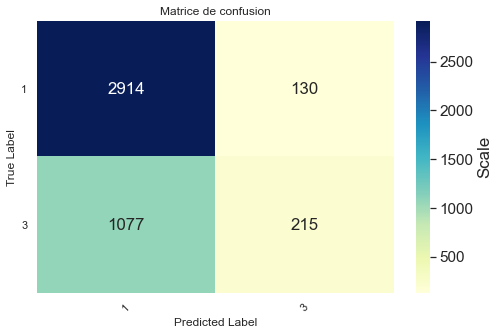

In [20]:
#from sklearn import metrics


y_pred = pipe.predict(X_test)

MyshowAllScores(y_test,y_pred)


### Tester la crosse validation 

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)


scoring = 'accuracy'


score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std())   

Les différentes accuracy pour les 10 évaluations sont [0.73029046 0.72337483 0.70519031 0.71349481 0.71626298 0.70865052
 0.72525952 0.74048443 0.72041522 0.71072664] 

Accuracy moyenne :  0.7194149712606546  standard deviation 0.01025535323307757


### Tester l'accuracy de plusieurs classifieur 

paramétrage par defaut des classifieurs 

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 12746)
(14452, 12746)
ADB
scores: 0.6844290657439446
GBC
scores: 0.6858131487889274
RFC
scores: 0.6740484429065744
KNC
scores: 0.6113033448673588
SVC
scores: 0.6883506343713955
logisticRegression
scores: 0.6934256055363323


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


text_normalizer=TextNormalizer(lowercase=True,
                               removestopwords=True,
                               removedigit=True,
                              getstemmer=True)  
# d'appliquer fit.transform pour appliquer les pré-traitements
dfVF.text=text_normalizer.fit_transform(dfVF.text)
# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 12746)
(14452, 12746)
ADB
scores: 0.6844290657439446
GBC
scores: 0.6858131487889274
RFC
scores: 0.6740484429065744
KNC
scores: 0.6113033448673588
SVC
scores: 0.6883506343713955
logisticRegression
scores: 0.6934256055363323


# Tache 2 : VRAIS, FAUX / MIXTURE

#  classification sans prétraitement


Nous avons crée une fonction qui permet d'effectuer une classification multi features et multi classifieurs qui permet de retourner le meilleur score ainsi que les meilleurs paramétres

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
def classification_sans_pretraitement(features):
        
        # selection des données
        X=dfVF_M[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1
)

        count_vect = CountVectorizer()
        datatarget = dfVF_M['truthRating']

        print(datatarget.shape)

        X_train_counts = count_vect.fit_transform(X)
        print(X_train_counts.shape)

        tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
        X_train_tf = tf_transformer.transform(X_train_counts)
        print(X_train_tf.shape)

        validation_size=0.3 #30% du jeu de données pour le test
        testsize= 1-validation_size
        seed=30

        X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                                datatarget, 
                                                train_size=validation_size, 
                                                random_state=seed,
                                                test_size=testsize)
        seed=1
        models = [
                'ADB',
                'GBC',
                'RFC',
                'KNC',
                'SVC',
                'logisticRegression'
                ]
        clfs = [
                AdaBoostClassifier(random_state=seed),
                GradientBoostingClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed,n_jobs=-1),
                KNeighborsClassifier(n_jobs=-1),
                SVC(random_state=seed,probability=True),
                LogisticRegression(solver='newton-cg', multi_class='multinomial')
                ]

        params = {
                models[0]:{'learning_rate':[ 0.3], 'n_estimators':[200]},
                models[1]:{'learning_rate':[0.3],'n_estimators':[100,200], 'max_depth':[3],
                        'min_samples_split':[2],'min_samples_leaf': [2]},
                models[2]:{'n_estimators':[200], 'criterion':['gini'],'min_samples_split':[2],
                        'min_samples_leaf': [2]},
                models[3]:{'n_neighbors':[2,3,4,5], 'weights':['distance'],'leaf_size':[15]},
                models[4]: {'C':[100], 'tol': [0.01],
                        'kernel':['sigmoid']},
                models[5]: {'C':[1000,2000], 'tol': [0.0001,0.001]}
                }

        bestScore=0
        Algo = []
        for name, estimator in zip(models,clfs):
                print(name)
                clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                                refit='True', n_jobs=-1, cv=5)
                clf.fit(X_train, y_train)

                print("best params: " + str(clf.best_params_))
                print("best scores: " + str(clf.best_score_))
                if clf.best_score_ > bestScore:
                    bestScore = clf.best_score_
                    Algo=[]
                    Algo.append(features)
                    Algo.append(name)
                    Algo.append(bestScore)
                    Algo.append(clf.best_params_)
                y_pred = clf.best_estimator_.predict(X_test)
                MyshowAllScores(y_test,y_pred)
        
        return Algo

En utilisent text claims comme jeu de donnée
(24452,)
(24452, 22754)
(24452, 22754)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6391274710293116
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.61027   0.37461   0.46424      7010
           1    0.65787   0.83408   0.73557     10107

    accuracy                        0.64591     17117
   macro avg    0.63407   0.60434   0.59991     17117
weighted avg    0.63838   0.64591   0.62445     17117



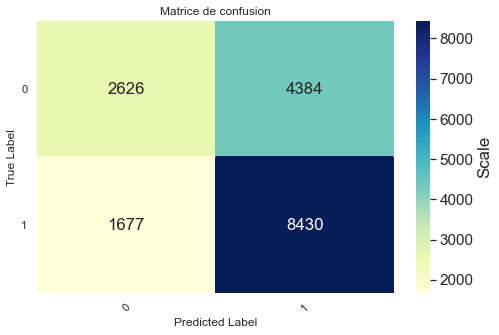

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6451261077027948
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.60017   0.40856   0.48617      7010
           1    0.66416   0.81122   0.73036     10107

    accuracy                        0.64632     17117
   macro avg    0.63216   0.60989   0.60826     17117
weighted avg    0.63795   0.64632   0.63035     17117



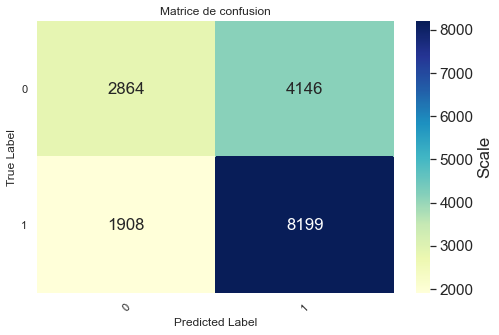

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6599863667348329
Accuracy : 0.654
Classification Report
              precision    recall  f1-score   support

           0    0.60500   0.44836   0.51503      7010
           1    0.67564   0.79697   0.73131     10107

    accuracy                        0.65420     17117
   macro avg    0.64032   0.62267   0.62317     17117
weighted avg    0.64671   0.65420   0.64274     17117



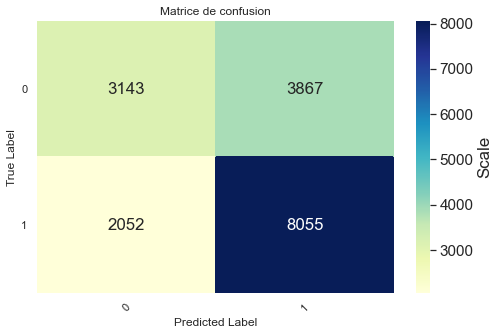

KNC
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.623858214042263
Accuracy : 0.626
Classification Report
              precision    recall  f1-score   support

           0    0.54234   0.55735   0.54974      7010
           1    0.68698   0.67379   0.68032     10107

    accuracy                        0.62610     17117
   macro avg    0.61466   0.61557   0.61503     17117
weighted avg    0.62774   0.62610   0.62684     17117



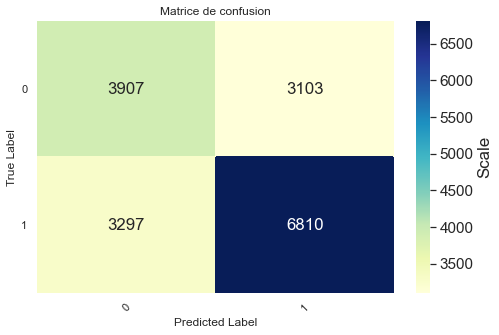

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6010906612133606
Accuracy : 0.594
Classification Report
              precision    recall  f1-score   support

           0    0.50364   0.53281   0.51782      7010
           1    0.66241   0.63580   0.64883     10107

    accuracy                        0.59362     17117
   macro avg    0.58302   0.58430   0.58332     17117
weighted avg    0.59739   0.59362   0.59517     17117



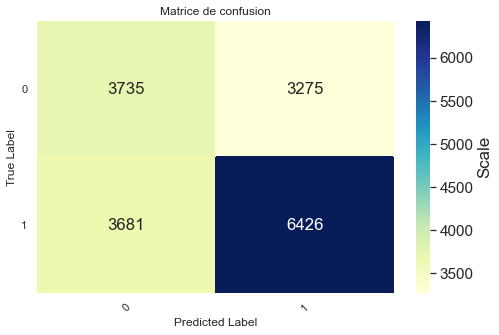

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.623858214042263
Accuracy : 0.613
Classification Report
              precision    recall  f1-score   support

           0    0.52839   0.50713   0.51754      7010
           1    0.66744   0.68606   0.67662     10107

    accuracy                        0.61278     17117
   macro avg    0.59791   0.59660   0.59708     17117
weighted avg    0.61049   0.61278   0.61147     17117



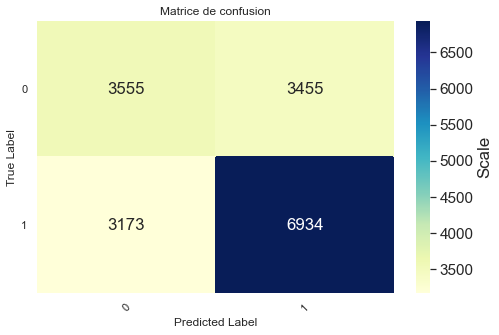

En utilisent text claims et author comme jeu de donnée
(24452,)
(24452, 24491)
(24452, 24491)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6808452624403545
Accuracy : 0.685
Classification Report
              precision    recall  f1-score   support

           0    0.59352   0.73466   0.65659      7010
           1    0.77962   0.65103   0.70955     10107

    accuracy                        0.68528     17117
   macro avg    0.68657   0.69285   0.68307     17117
weighted avg    0.70341   0.68528   0.68786     17117



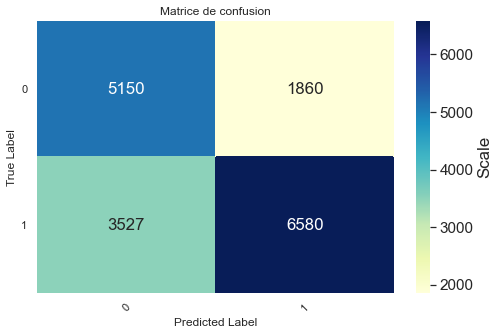

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6819359236537151
Accuracy : 0.685
Classification Report
              precision    recall  f1-score   support

           0    0.59513   0.71840   0.65098      7010
           1    0.77192   0.66103   0.71218     10107

    accuracy                        0.68452     17117
   macro avg    0.68353   0.68971   0.68158     17117
weighted avg    0.69952   0.68452   0.68712     17117



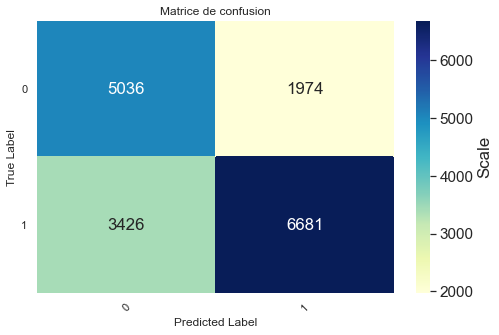

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6846625766871165
Accuracy : 0.679
Classification Report
              precision    recall  f1-score   support

           0    0.62188   0.55064   0.58410      7010
           1    0.71127   0.76778   0.73845     10107

    accuracy                        0.67886     17117
   macro avg    0.66658   0.65921   0.66127     17117
weighted avg    0.67466   0.67886   0.67524     17117



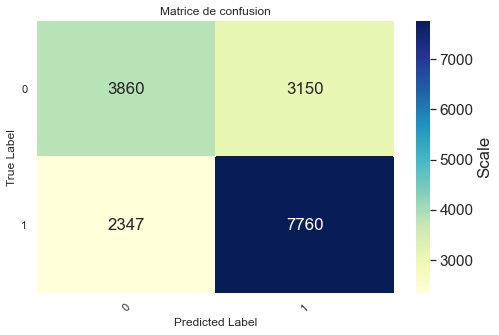

KNC
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.6430811179277438
Accuracy : 0.642
Classification Report
              precision    recall  f1-score   support

           0    0.56313   0.56120   0.56216      7010
           1    0.69638   0.69803   0.69720     10107

    accuracy                        0.64199     17117
   macro avg    0.62975   0.62961   0.62968     17117
weighted avg    0.64181   0.64199   0.64190     17117



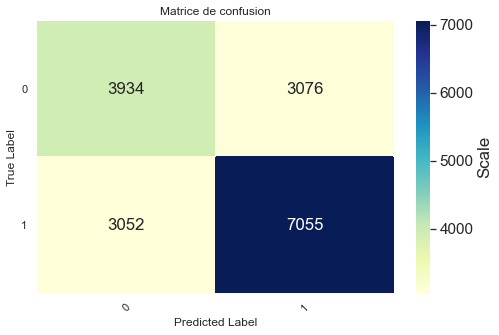

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6145875937286981
Accuracy : 0.607
Classification Report
              precision    recall  f1-score   support

           0    0.51930   0.54308   0.53093      7010
           1    0.67270   0.65133   0.66184     10107

    accuracy                        0.60700     17117
   macro avg    0.59600   0.59721   0.59638     17117
weighted avg    0.60988   0.60700   0.60823     17117



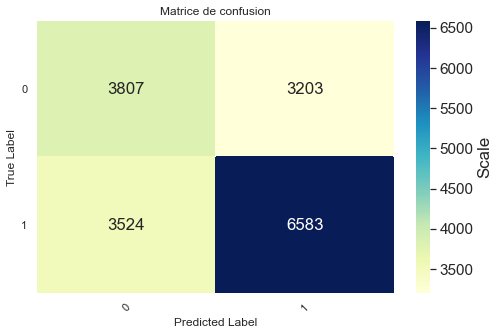

logisticRegression
best params: {'C': 1000, 'tol': 0.001}
best scores: 0.6417177914110429
Accuracy : 0.635
Classification Report
              precision    recall  f1-score   support

           0    0.55767   0.52967   0.54331      7010
           1    0.68477   0.70862   0.69649     10107

    accuracy                        0.63533     17117
   macro avg    0.62122   0.61914   0.61990     17117
weighted avg    0.63272   0.63533   0.63376     17117



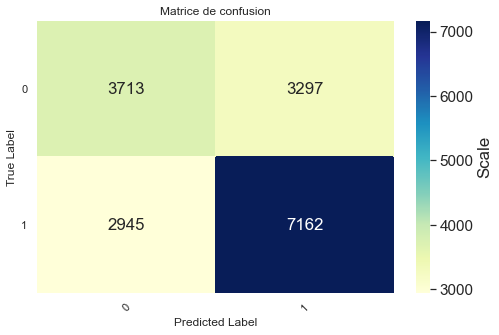

En utilisent text claims, headline et author comme jeu de donnée
(24452,)
(24452, 26782)
(24452, 26782)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7015678254942059
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61829   0.70613   0.65930      7010
           1    0.77390   0.69764   0.73379     10107

    accuracy                        0.70112     17117
   macro avg    0.69609   0.70188   0.69654     17117
weighted avg    0.71017   0.70112   0.70328     17117



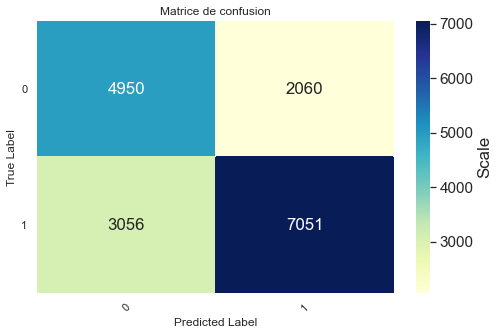

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6958418541240626
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.61204   0.68459   0.64629      7010
           1    0.76164   0.69902   0.72899     10107

    accuracy                        0.69311     17117
   macro avg    0.68684   0.69181   0.68764     17117
weighted avg    0.70038   0.69311   0.69512     17117



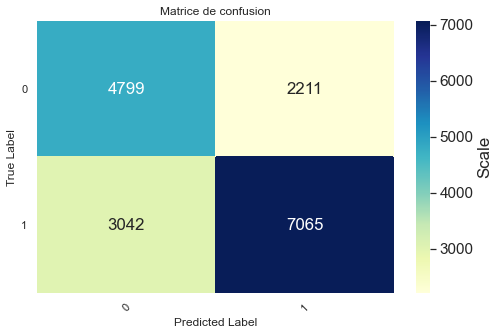

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6991138377641446
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.63804   0.58816   0.61208      7010
           1    0.72905   0.76858   0.74829     10107

    accuracy                        0.69469     17117
   macro avg    0.68354   0.67837   0.68019     17117
weighted avg    0.69178   0.69469   0.69251     17117



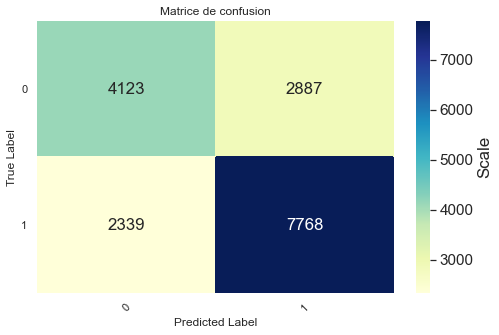

KNC
best params: {'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
best scores: 0.6343558282208589
Accuracy : 0.634
Classification Report
              precision    recall  f1-score   support

           0    0.55424   0.54665   0.55042      7010
           1    0.68852   0.69506   0.69178     10107

    accuracy                        0.63428     17117
   macro avg    0.62138   0.62086   0.62110     17117
weighted avg    0.63353   0.63428   0.63389     17117



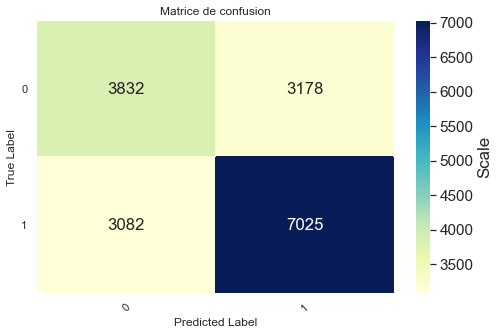

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6158145875937288
Accuracy : 0.622
Classification Report
              precision    recall  f1-score   support

           0    0.53829   0.54551   0.54187      7010
           1    0.68181   0.67547   0.67863     10107

    accuracy                        0.62225     17117
   macro avg    0.61005   0.61049   0.61025     17117
weighted avg    0.62304   0.62225   0.62262     17117



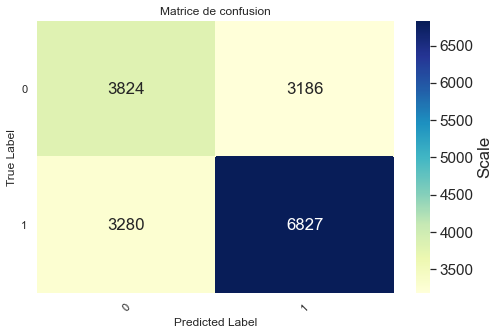

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6413087934560326
Accuracy : 0.651
Classification Report
              precision    recall  f1-score   support

           0    0.57947   0.53780   0.55786      7010
           1    0.69466   0.72930   0.71156     10107

    accuracy                        0.65087     17117
   macro avg    0.63706   0.63355   0.63471     17117
weighted avg    0.64748   0.65087   0.64861     17117



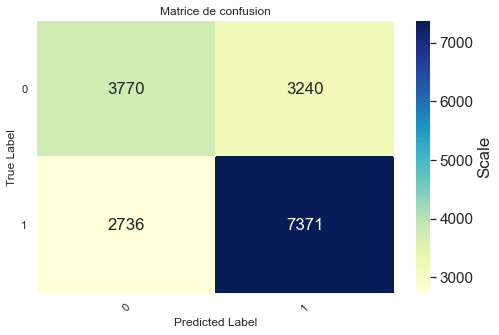

En utilisent text claims, headline, author et truthRating comme jeu de donnée
(24452,)
(24452, 26782)
(24452, 26782)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7015678254942059
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61829   0.70613   0.65930      7010
           1    0.77390   0.69764   0.73379     10107

    accuracy                        0.70112     17117
   macro avg    0.69609   0.70188   0.69654     17117
weighted avg    0.71017   0.70112   0.70328     17117



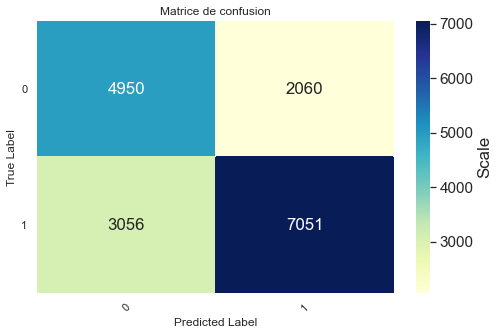

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6958418541240626
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.61204   0.68459   0.64629      7010
           1    0.76164   0.69902   0.72899     10107

    accuracy                        0.69311     17117
   macro avg    0.68684   0.69181   0.68764     17117
weighted avg    0.70038   0.69311   0.69512     17117



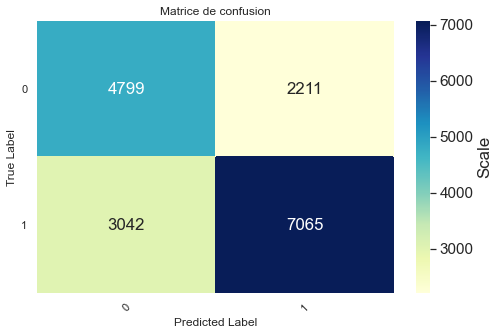

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6991138377641446
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.63804   0.58816   0.61208      7010
           1    0.72905   0.76858   0.74829     10107

    accuracy                        0.69469     17117
   macro avg    0.68354   0.67837   0.68019     17117
weighted avg    0.69178   0.69469   0.69251     17117



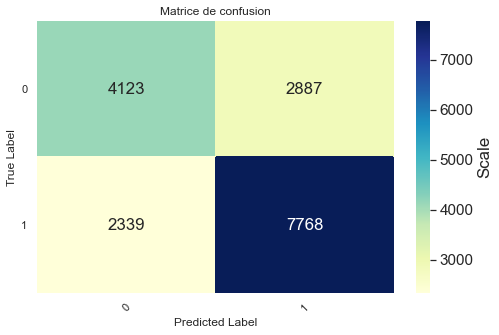

KNC
best params: {'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
best scores: 0.6343558282208589
Accuracy : 0.634
Classification Report
              precision    recall  f1-score   support

           0    0.55424   0.54665   0.55042      7010
           1    0.68852   0.69506   0.69178     10107

    accuracy                        0.63428     17117
   macro avg    0.62138   0.62086   0.62110     17117
weighted avg    0.63353   0.63428   0.63389     17117



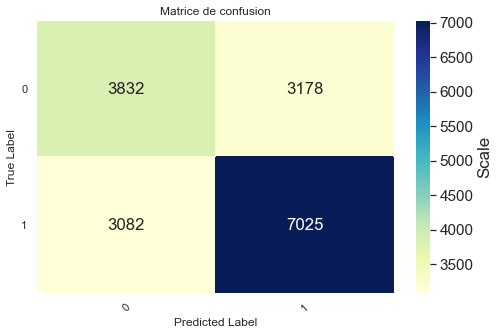

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6158145875937288
Accuracy : 0.622
Classification Report
              precision    recall  f1-score   support

           0    0.53829   0.54551   0.54187      7010
           1    0.68181   0.67547   0.67863     10107

    accuracy                        0.62225     17117
   macro avg    0.61005   0.61049   0.61025     17117
weighted avg    0.62304   0.62225   0.62262     17117



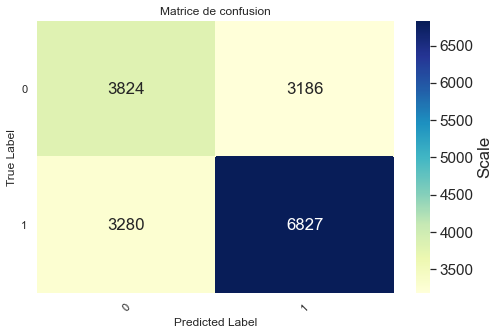

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6413087934560326
Accuracy : 0.651
Classification Report
              precision    recall  f1-score   support

           0    0.57947   0.53780   0.55786      7010
           1    0.69466   0.72930   0.71156     10107

    accuracy                        0.65087     17117
   macro avg    0.63706   0.63355   0.63471     17117
weighted avg    0.64748   0.65087   0.64861     17117



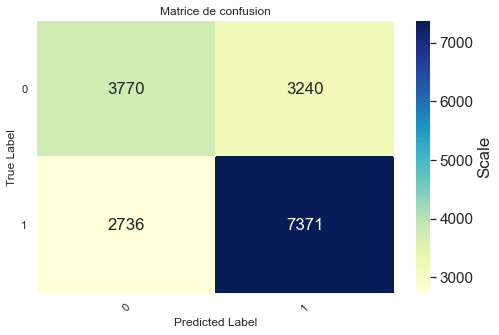

En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée
(24452,)
(24452, 27803)
(24452, 27803)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7082481254260395
Accuracy : 0.699
Classification Report
              precision    recall  f1-score   support

           0    0.61610   0.70399   0.65712      7010
           1    0.77215   0.69576   0.73197     10107

    accuracy                        0.69913     17117
   macro avg    0.69413   0.69987   0.69455     17117
weighted avg    0.70825   0.69913   0.70132     17117



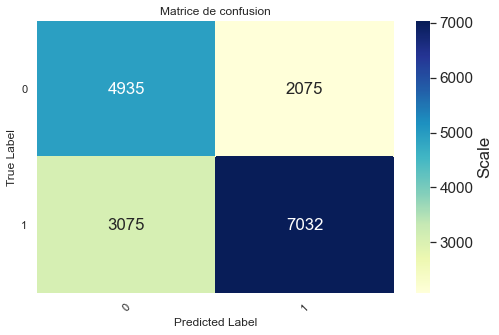

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6973415132924335
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.61471   0.68802   0.64930      7010
           1    0.76410   0.70090   0.73114     10107

    accuracy                        0.69562     17117
   macro avg    0.68941   0.69446   0.69022     17117
weighted avg    0.70292   0.69562   0.69762     17117



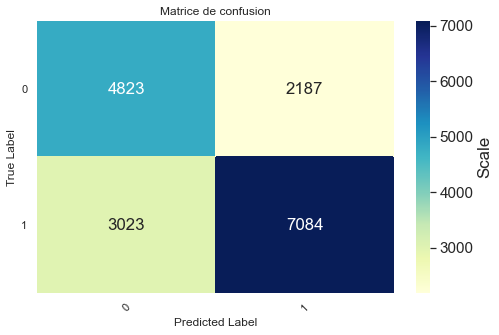

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7036128152692569
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.62443   0.64750   0.63576      7010
           1    0.74909   0.72989   0.73936     10107

    accuracy                        0.69615     17117
   macro avg    0.68676   0.68870   0.68756     17117
weighted avg    0.69804   0.69615   0.69693     17117



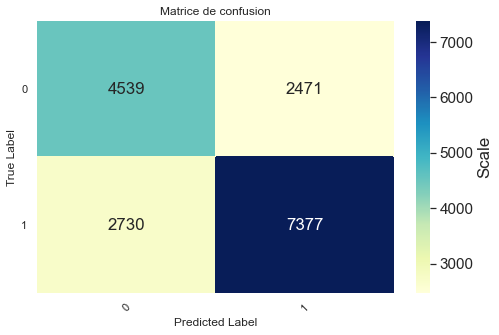

KNC
best params: {'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
best scores: 0.6441717791411042
Accuracy : 0.640
Classification Report
              precision    recall  f1-score   support

           0    0.56209   0.54565   0.55375      7010
           1    0.69114   0.70515   0.69808     10107

    accuracy                        0.63983     17117
   macro avg    0.62661   0.62540   0.62591     17117
weighted avg    0.63829   0.63983   0.63897     17117



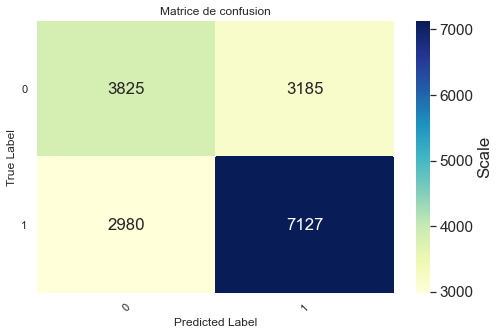

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6190865712338105
Accuracy : 0.626
Classification Report
              precision    recall  f1-score   support

           0    0.54287   0.54650   0.54468      7010
           1    0.68400   0.68082   0.68240     10107

    accuracy                        0.62581     17117
   macro avg    0.61343   0.61366   0.61354     17117
weighted avg    0.62620   0.62581   0.62600     17117



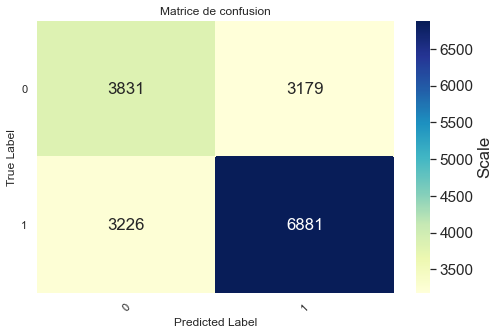

logisticRegression
best params: {'C': 1000, 'tol': 0.001}
best scores: 0.6490797546012269
Accuracy : 0.655
Classification Report
              precision    recall  f1-score   support

           0    0.58510   0.54337   0.56346      7010
           1    0.69822   0.73276   0.71507     10107

    accuracy                        0.65520     17117
   macro avg    0.64166   0.63806   0.63927     17117
weighted avg    0.65189   0.65520   0.65298     17117



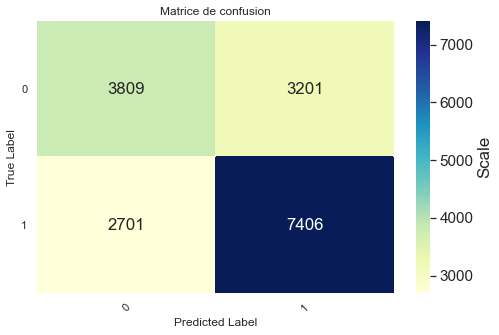

En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée
(24452,)
(24452, 51404)
(24452, 51404)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7014314928425358
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.61423   0.69344   0.65143      7010
           1    0.76649   0.69793   0.73061     10107

    accuracy                        0.69609     17117
   macro avg    0.69036   0.69569   0.69102     17117
weighted avg    0.70413   0.69609   0.69818     17117



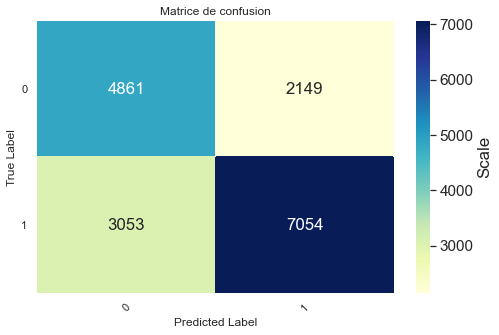

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6946148602590321
Accuracy : 0.692
Classification Report
              precision    recall  f1-score   support

           0    0.61302   0.67047   0.64046      7010
           1    0.75556   0.70644   0.73017     10107

    accuracy                        0.69171     17117
   macro avg    0.68429   0.68846   0.68532     17117
weighted avg    0.69718   0.69171   0.69343     17117



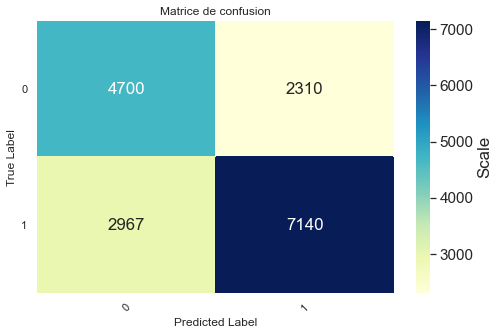

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7019768234492161
Accuracy : 0.704
Classification Report
              precision    recall  f1-score   support

           0    0.63508   0.64922   0.64207      7010
           1    0.75289   0.74127   0.74703     10107

    accuracy                        0.70357     17117
   macro avg    0.69399   0.69524   0.69455     17117
weighted avg    0.70464   0.70357   0.70405     17117



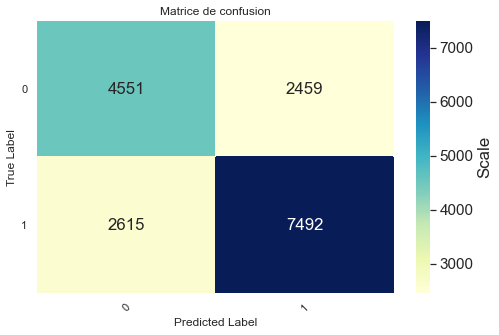

KNC
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.6513974096796182
Accuracy : 0.647
Classification Report
              precision    recall  f1-score   support

           0    0.56678   0.58659   0.57652      7010
           1    0.70614   0.68903   0.69748     10107

    accuracy                        0.64708     17117
   macro avg    0.63646   0.63781   0.63700     17117
weighted avg    0.64907   0.64708   0.64794     17117



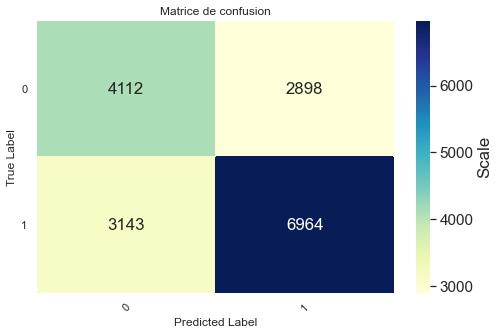

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.625357873210634
Accuracy : 0.627
Classification Report
              precision    recall  f1-score   support

           0    0.54304   0.55977   0.55128      7010
           1    0.68800   0.67330   0.68057     10107

    accuracy                        0.62680     17117
   macro avg    0.61552   0.61653   0.61592     17117
weighted avg    0.62863   0.62680   0.62762     17117



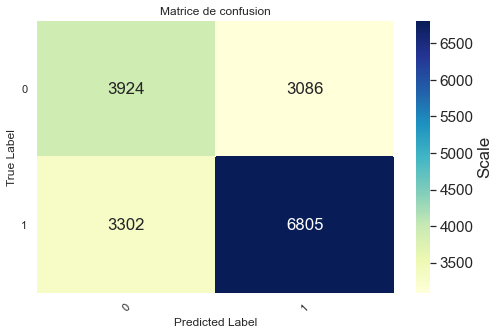

logisticRegression
best params: {'C': 1000, 'tol': 0.001}
best scores: 0.6717109747784594
Accuracy : 0.667
Classification Report
              precision    recall  f1-score   support

           0    0.59894   0.56305   0.58044      7010
           1    0.70903   0.73850   0.72347     10107

    accuracy                        0.66665     17117
   macro avg    0.65399   0.65078   0.65195     17117
weighted avg    0.66395   0.66665   0.66489     17117



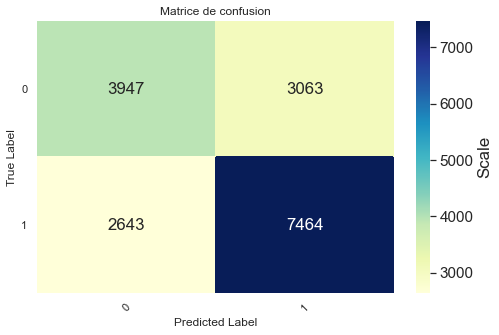

In [15]:
import numpy as np
bestScoredAlgo_sansPretraitement = []

print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_sans_pretraitement(features)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_sans_pretraitement(features)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_sans_pretraitement(features)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline, author et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
score=classification_sans_pretraitement(features)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords"])
score=classification_sans_pretraitement(features)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords","named_entities_claim"])
score=classification_sans_pretraitement(features)
bestScoredAlgo_sansPretraitement.append(score)

In [48]:

bestScoredAlgo_sansPretraitement.sort(key=lambda x: x[2])


#  classification avec prétraitement

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

def classification_avec_pretraitement(features,cleaner_):
        
        # selection des données
        X=dfVF_M[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
        y= dfVF_M['truthRating']
        validation_size=0.3 #30% du jeu de données pour le test
        testsize= 1-validation_size
        seed=30

        X_train,X_test,y_train,y_test=train_test_split(X,
                                                y, 
                                                train_size=validation_size, 
                                                random_state=seed,
                                                test_size=testsize)
        pipe = Pipeline([("cleaner", cleaner_),
                 ("tfidf_vectorizer", TfidfVectorizer(lowercase=False)),
                 ("clf", AdaBoostClassifier())]) #default Calssifier
        seed=7
        models = [
                'ADB',
                'GBC',
                'RFC',
                'KNC',
                'SVC',
                'logisticRegression'
                ]
        clfs = [
                AdaBoostClassifier(random_state=seed),
                GradientBoostingClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed,n_jobs=-1),
                KNeighborsClassifier(n_jobs=-1),
                SVC(random_state=seed,probability=True),
                LogisticRegression(solver='newton-cg', multi_class='multinomial')
                ]

        params = {
                models[0]:{'clf__learning_rate':[ 0.3], 'clf__n_estimators':[200]},
                models[1]:{'clf__learning_rate':[0.3],'clf__n_estimators':[100,200], 'clf__max_depth':[3],
                         'clf__min_samples_split':[2],'clf__min_samples_leaf': [2]},
                models[2]:{'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]},
                models[3]:{'clf__n_neighbors':[2,3,4,5], 'clf__weights':['distance'],'clf__leaf_size':[15]},
                models[4]: {'clf__C':[100], 'clf__tol': [0.01],
                        'clf__kernel':['sigmoid']},
                models[5]: {'clf__C':[1000,2000], 'clf__tol': [0.0001,0.001]}
                }

        bestScore=0
        Algo = []
        for name, estimator in zip(models,clfs):
                print("Alogrithm: "+name)
                pipe.set_params(clf= estimator)
                clf = GridSearchCV(pipe, params[name], scoring='accuracy',
                                refit='True', n_jobs=-1, cv=5)
                clf.fit(X_train, y_train)

                print("best params: " + str(clf.best_params_))
                print("best scores: " + str(clf.best_score_))
                if clf.best_score_ > bestScore:
                    bestScore = clf.best_score_
                    Algo=[]
                    Algo.append(features)
                    Algo.append(cleaner_)
                    Algo.append(name)
                    Algo.append(bestScore)
                    Algo.append(clf.best_params_)
                y_pred = clf.best_estimator_.predict(X_test)
                MyshowAllScores(y_test,y_pred)
        
        return Algo

### Application du prétraitement par défaut

En utilisent text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6422631220177233
Accuracy : 0.645
Classification Report
              precision    recall  f1-score   support

           0    0.60718   0.37660   0.46487      7010
           1    0.65776   0.83101   0.73431     10107

    accuracy                        0.64491     17117
   macro avg    0.63247   0.60381   0.59959     17117
weighted avg    0.63705   0.64491   0.62396     17117



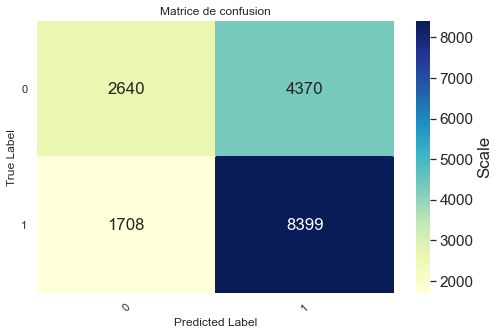

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6414451261077028
Accuracy : 0.641
Classification Report
              precision    recall  f1-score   support

           0    0.58161   0.43766   0.49947      7010
           1    0.66712   0.78164   0.71985     10107

    accuracy                        0.64077     17117
   macro avg    0.62436   0.60965   0.60966     17117
weighted avg    0.63210   0.64077   0.62960     17117



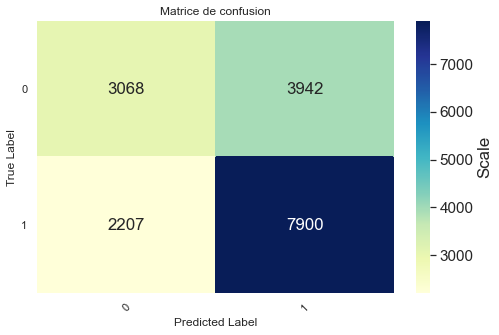

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6578050443081118
Accuracy : 0.660
Classification Report
              precision    recall  f1-score   support

           0    0.60061   0.50499   0.54867      7010
           1    0.69081   0.76709   0.72696     10107

    accuracy                        0.65975     17117
   macro avg    0.64571   0.63604   0.63781     17117
weighted avg    0.65387   0.65975   0.65394     17117



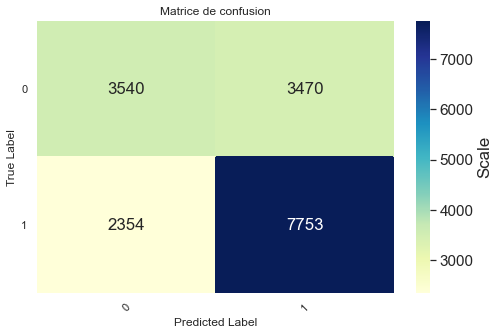

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.6284935241990457
Accuracy : 0.624
Classification Report
              precision    recall  f1-score   support

           0    0.53922   0.55706   0.54799      7010
           1    0.68557   0.66983   0.67761     10107

    accuracy                        0.62365     17117
   macro avg    0.61239   0.61345   0.61280     17117
weighted avg    0.62563   0.62365   0.62453     17117



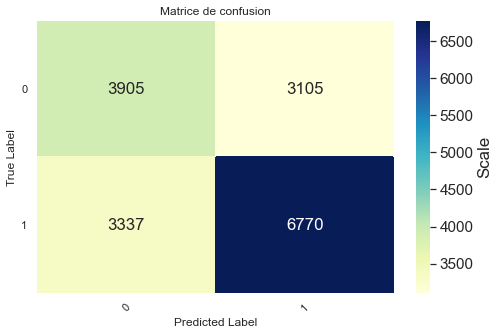

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.596182685753238
Accuracy : 0.583
Classification Report
              precision    recall  f1-score   support

           0    0.49210   0.54180   0.51575      7010
           1    0.65826   0.61215   0.63437     10107

    accuracy                        0.58334     17117
   macro avg    0.57518   0.57697   0.57506     17117
weighted avg    0.59021   0.58334   0.58579     17117



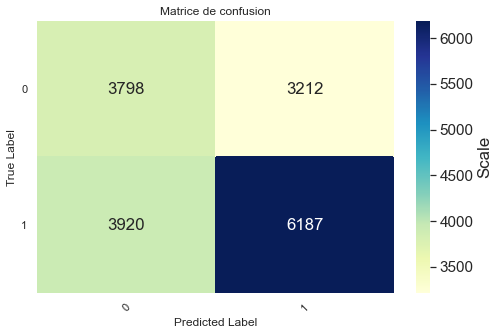

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.621676891615542
Accuracy : 0.612
Classification Report
              precision    recall  f1-score   support

           0    0.52629   0.52111   0.52369      7010
           1    0.67011   0.67468   0.67239     10107

    accuracy                        0.61179     17117
   macro avg    0.59820   0.59790   0.59804     17117
weighted avg    0.61121   0.61179   0.61149     17117



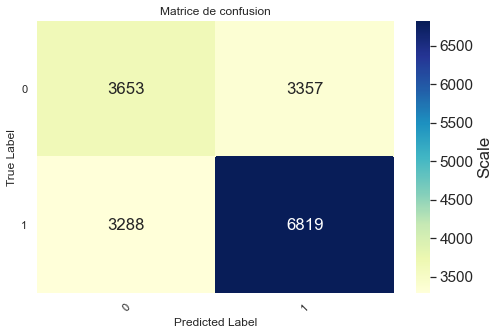

En utilisent text claims et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6805725971370145
Accuracy : 0.682
Classification Report
              precision    recall  f1-score   support

           0    0.59165   0.71926   0.64924      7010
           1    0.77103   0.65568   0.70869     10107

    accuracy                        0.68172     17117
   macro avg    0.68134   0.68747   0.67897     17117
weighted avg    0.69757   0.68172   0.68435     17117



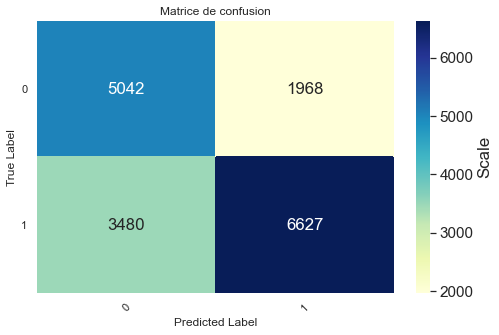

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6811179277436946
Accuracy : 0.676
Classification Report
              precision    recall  f1-score   support

           0    0.58678   0.70899   0.64212      7010
           1    0.76408   0.65371   0.70460     10107

    accuracy                        0.67635     17117
   macro avg    0.67543   0.68135   0.67336     17117
weighted avg    0.69147   0.67635   0.67901     17117



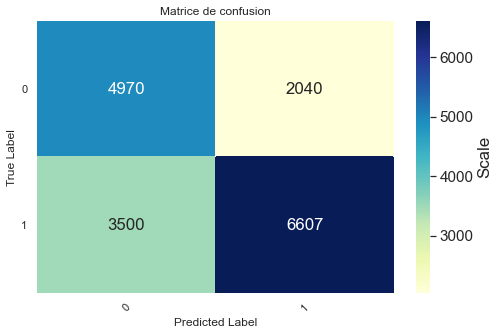

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6922972051806408
Accuracy : 0.688
Classification Report
              precision    recall  f1-score   support

           0    0.61956   0.61541   0.61748      7010
           1    0.73449   0.73790   0.73619     10107

    accuracy                        0.68774     17117
   macro avg    0.67702   0.67666   0.67683     17117
weighted avg    0.68742   0.68774   0.68757     17117



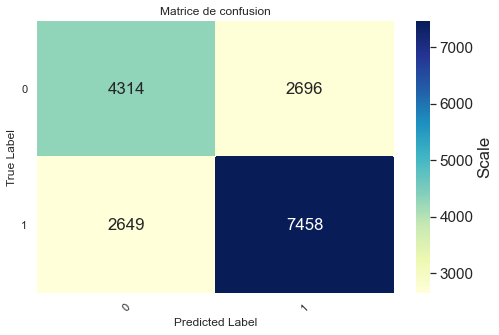

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.6407634628493525
Accuracy : 0.642
Classification Report
              precision    recall  f1-score   support

           0    0.56330   0.56491   0.56410      7010
           1    0.69763   0.69625   0.69694     10107

    accuracy                        0.64246     17117
   macro avg    0.63047   0.63058   0.63052     17117
weighted avg    0.64262   0.64246   0.64254     17117



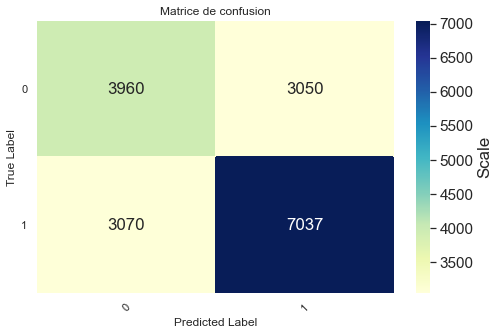

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.612815269256987
Accuracy : 0.605
Classification Report
              precision    recall  f1-score   support

           0    0.51677   0.53623   0.52632      7010
           1    0.66971   0.65222   0.66085     10107

    accuracy                        0.60472     17117
   macro avg    0.59324   0.59423   0.59359     17117
weighted avg    0.60708   0.60472   0.60576     17117



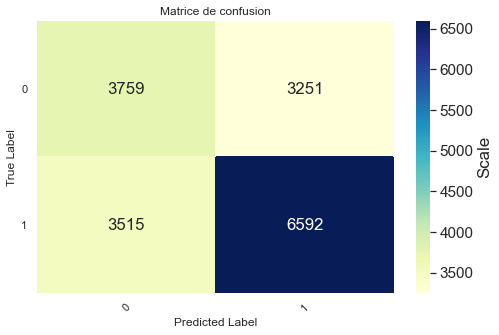

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6415814587593729
Accuracy : 0.638
Classification Report
              precision    recall  f1-score   support

           0    0.56089   0.53680   0.54858      7010
           1    0.68803   0.70852   0.69812     10107

    accuracy                        0.63820     17117
   macro avg    0.62446   0.62266   0.62335     17117
weighted avg    0.63596   0.63820   0.63688     17117



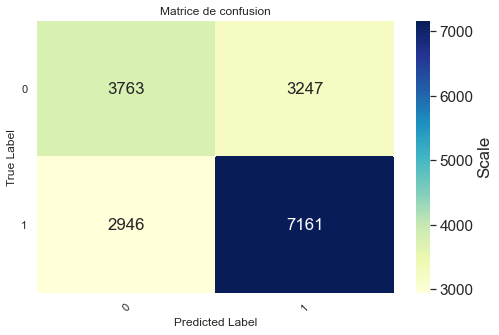

En utilisent text claims, headline et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7022494887525561
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61730   0.71056   0.66065      7010
           1    0.77575   0.69447   0.73286     10107

    accuracy                        0.70106     17117
   macro avg    0.69653   0.70251   0.69676     17117
weighted avg    0.71086   0.70106   0.70329     17117



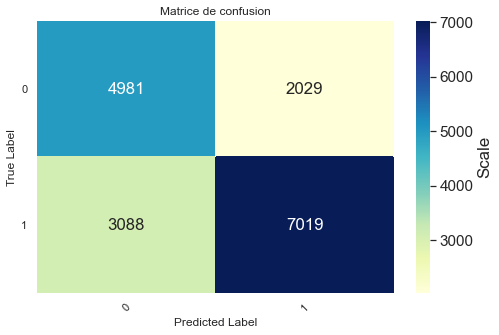

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6931152010906612
Accuracy : 0.697
Classification Report
              precision    recall  f1-score   support

           0    0.61331   0.70071   0.65410      7010
           1    0.76965   0.69358   0.72964     10107

    accuracy                        0.69650     17117
   macro avg    0.69148   0.69715   0.69187     17117
weighted avg    0.70563   0.69650   0.69870     17117



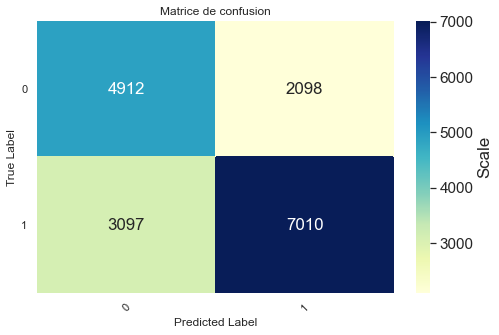

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6992501704158146
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.62905   0.62896   0.62900      7010
           1    0.74268   0.74275   0.74272     10107

    accuracy                        0.69615     17117
   macro avg    0.68586   0.68586   0.68586     17117
weighted avg    0.69614   0.69615   0.69615     17117



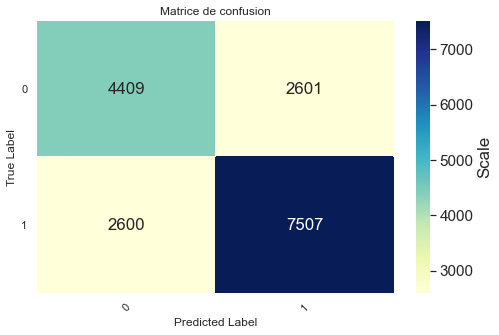

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.639945466939332
Accuracy : 0.636
Classification Report
              precision    recall  f1-score   support

           0    0.55604   0.54993   0.55297      7010
           1    0.69020   0.69546   0.69282     10107

    accuracy                        0.63586     17117
   macro avg    0.62312   0.62269   0.62289     17117
weighted avg    0.63526   0.63586   0.63554     17117



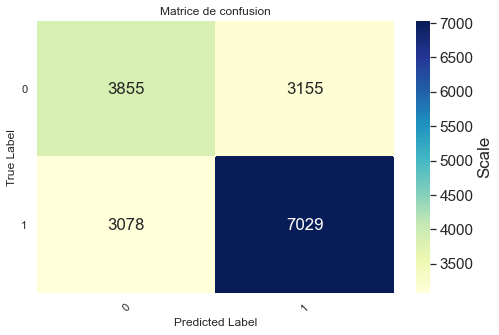

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6121336059986366
Accuracy : 0.624
Classification Report
              precision    recall  f1-score   support

           0    0.53990   0.54922   0.54452      7010
           1    0.68356   0.67537   0.67944     10107

    accuracy                        0.62371     17117
   macro avg    0.61173   0.61229   0.61198     17117
weighted avg    0.62472   0.62371   0.62418     17117



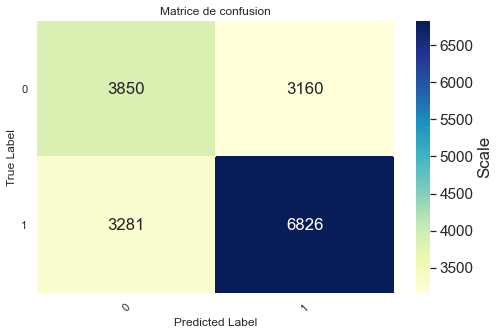

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6545330606680301
Accuracy : 0.657
Classification Report
              precision    recall  f1-score   support

           0    0.58674   0.54807   0.56675      7010
           1    0.70026   0.73226   0.71590     10107

    accuracy                        0.65683     17117
   macro avg    0.64350   0.64017   0.64133     17117
weighted avg    0.65377   0.65683   0.65482     17117



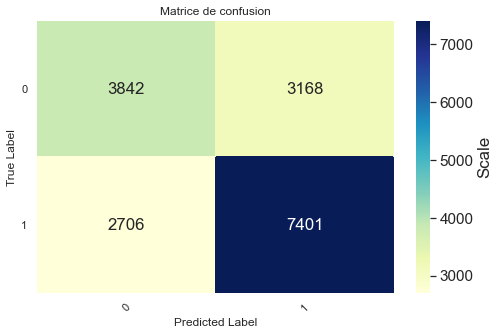

En utilisent text claims, headline, author et truthRating comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7022494887525561
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61730   0.71056   0.66065      7010
           1    0.77575   0.69447   0.73286     10107

    accuracy                        0.70106     17117
   macro avg    0.69653   0.70251   0.69676     17117
weighted avg    0.71086   0.70106   0.70329     17117



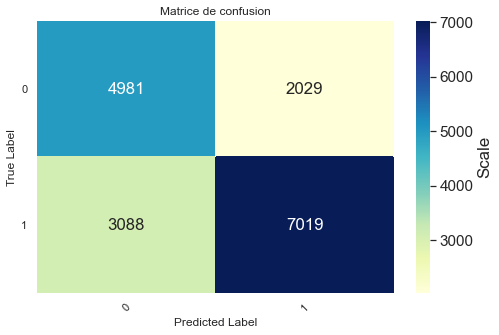

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6931152010906612
Accuracy : 0.697
Classification Report
              precision    recall  f1-score   support

           0    0.61331   0.70071   0.65410      7010
           1    0.76965   0.69358   0.72964     10107

    accuracy                        0.69650     17117
   macro avg    0.69148   0.69715   0.69187     17117
weighted avg    0.70563   0.69650   0.69870     17117



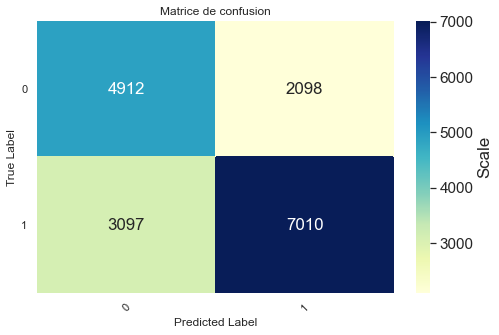

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6992501704158146
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.62905   0.62896   0.62900      7010
           1    0.74268   0.74275   0.74272     10107

    accuracy                        0.69615     17117
   macro avg    0.68586   0.68586   0.68586     17117
weighted avg    0.69614   0.69615   0.69615     17117



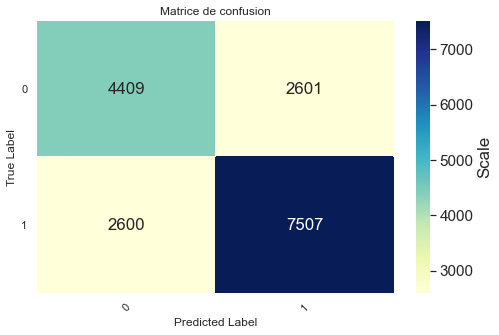

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.639945466939332
Accuracy : 0.636
Classification Report
              precision    recall  f1-score   support

           0    0.55604   0.54993   0.55297      7010
           1    0.69020   0.69546   0.69282     10107

    accuracy                        0.63586     17117
   macro avg    0.62312   0.62269   0.62289     17117
weighted avg    0.63526   0.63586   0.63554     17117



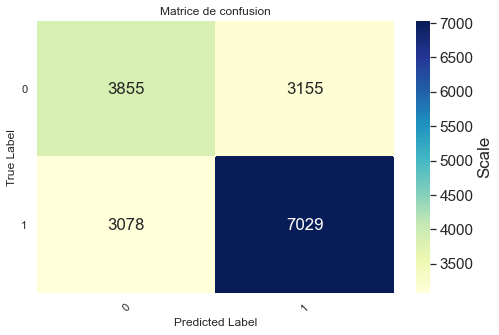

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6121336059986366
Accuracy : 0.624
Classification Report
              precision    recall  f1-score   support

           0    0.53990   0.54922   0.54452      7010
           1    0.68356   0.67537   0.67944     10107

    accuracy                        0.62371     17117
   macro avg    0.61173   0.61229   0.61198     17117
weighted avg    0.62472   0.62371   0.62418     17117



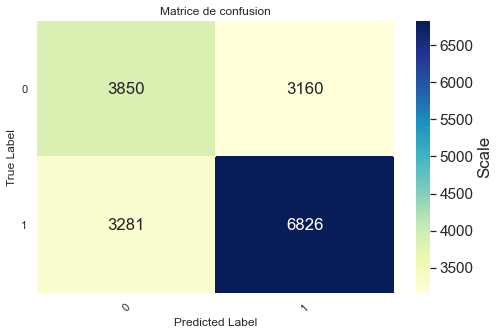

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6545330606680301
Accuracy : 0.657
Classification Report
              precision    recall  f1-score   support

           0    0.58674   0.54807   0.56675      7010
           1    0.70026   0.73226   0.71590     10107

    accuracy                        0.65683     17117
   macro avg    0.64350   0.64017   0.64133     17117
weighted avg    0.65377   0.65683   0.65482     17117



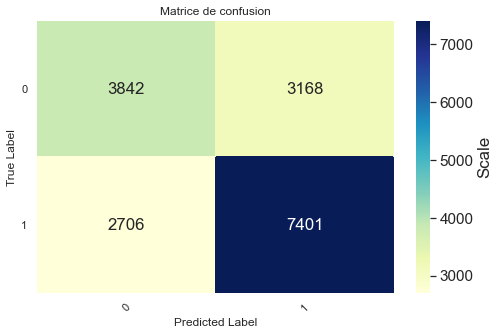

En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7052488070892978
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.61704   0.71783   0.66363      7010
           1    0.77929   0.69101   0.73250     10107

    accuracy                        0.70199     17117
   macro avg    0.69817   0.70442   0.69807     17117
weighted avg    0.71285   0.70199   0.70430     17117



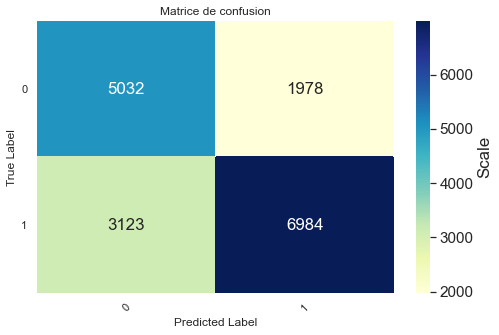

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7004771642808452
Accuracy : 0.697
Classification Report
              precision    recall  f1-score   support

           0    0.61555   0.69344   0.65218      7010
           1    0.76692   0.69961   0.73172     10107

    accuracy                        0.69708     17117
   macro avg    0.69123   0.69653   0.69195     17117
weighted avg    0.70493   0.69708   0.69915     17117



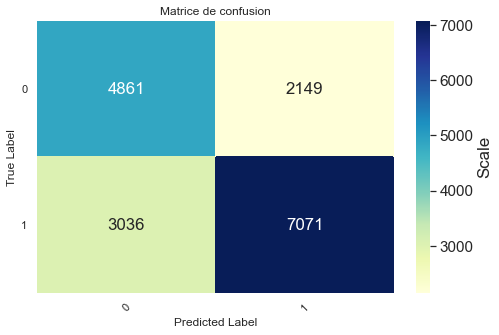

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7017041581458758
Accuracy : 0.698
Classification Report
              precision    recall  f1-score   support

           0    0.61907   0.67974   0.64799      7010
           1    0.76168   0.70990   0.73488     10107

    accuracy                        0.69755     17117
   macro avg    0.69037   0.69482   0.69144     17117
weighted avg    0.70328   0.69755   0.69930     17117



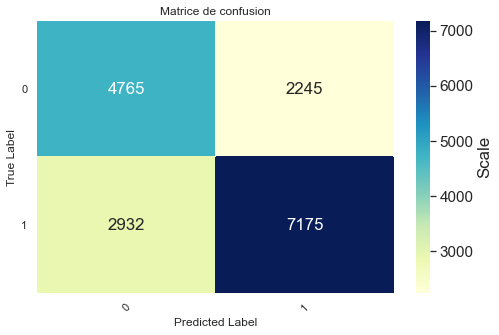

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.650988411724608
Accuracy : 0.650
Classification Report
              precision    recall  f1-score   support

           0    0.57308   0.57275   0.57292      7010
           1    0.70379   0.70407   0.70393     10107

    accuracy                        0.65029     17117
   macro avg    0.63843   0.63841   0.63842     17117
weighted avg    0.65026   0.65029   0.65027     17117



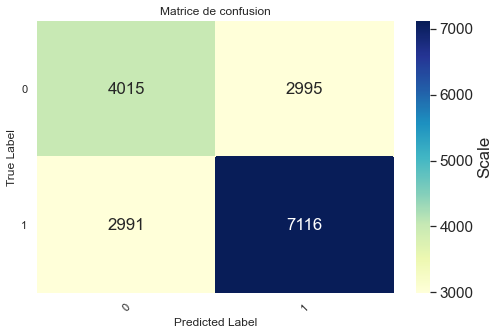

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6170415814587593
Accuracy : 0.627
Classification Report
              precision    recall  f1-score   support

           0    0.54343   0.56049   0.55183      7010
           1    0.68838   0.67339   0.68080     10107

    accuracy                        0.62715     17117
   macro avg    0.61590   0.61694   0.61632     17117
weighted avg    0.62902   0.62715   0.62798     17117



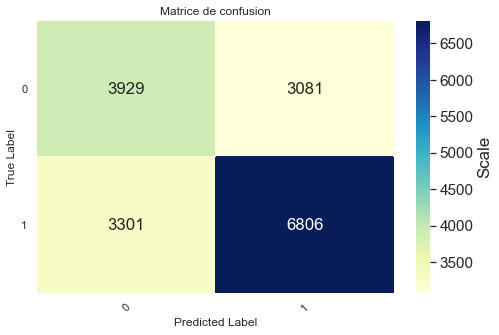

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6569870483980914
Accuracy : 0.661
Classification Report
              precision    recall  f1-score   support

           0    0.59150   0.55378   0.57202      7010
           1    0.70362   0.73474   0.71884     10107

    accuracy                        0.66063     17117
   macro avg    0.64756   0.64426   0.64543     17117
weighted avg    0.65770   0.66063   0.65871     17117



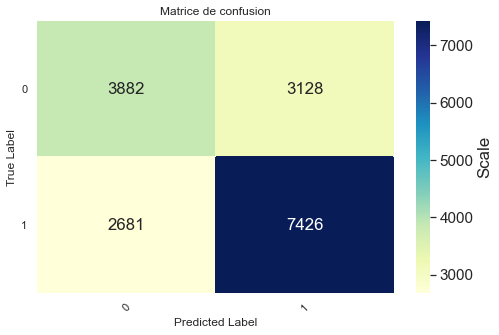

En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7060668029993182
Accuracy : 0.700
Classification Report
              precision    recall  f1-score   support

           0    0.61766   0.70243   0.65732      7010
           1    0.77190   0.69843   0.73333     10107

    accuracy                        0.70006     17117
   macro avg    0.69478   0.70043   0.69532     17117
weighted avg    0.70873   0.70006   0.70220     17117



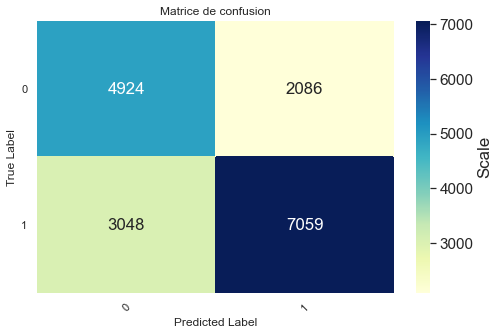

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7025221540558964
Accuracy : 0.689
Classification Report
              precision    recall  f1-score   support

           0    0.61578   0.63809   0.62673      7010
           1    0.74251   0.72385   0.73307     10107

    accuracy                        0.68873     17117
   macro avg    0.67915   0.68097   0.67990     17117
weighted avg    0.69061   0.68873   0.68952     17117



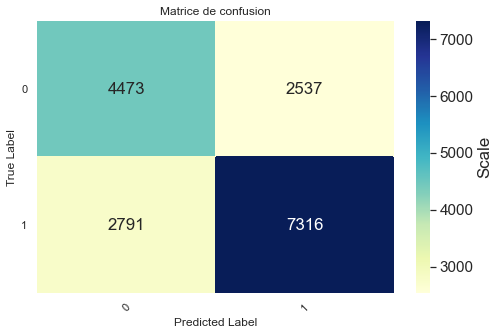

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7023858214042263
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.62933   0.65877   0.64371      7010
           1    0.75539   0.73088   0.74293     10107

    accuracy                        0.70135     17117
   macro avg    0.69236   0.69483   0.69332     17117
weighted avg    0.70377   0.70135   0.70230     17117



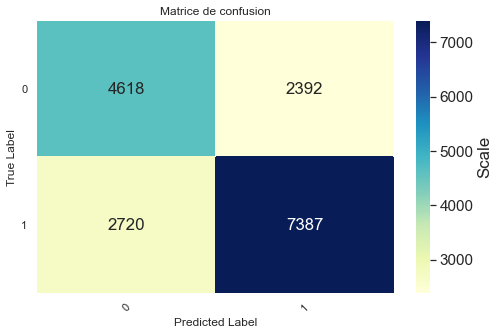

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.6485344239945467
Accuracy : 0.652
Classification Report
              precision    recall  f1-score   support

           0    0.57203   0.59700   0.58425      7010
           1    0.71176   0.69021   0.70082     10107

    accuracy                        0.65204     17117
   macro avg    0.64190   0.64361   0.64254     17117
weighted avg    0.65454   0.65204   0.65308     17117



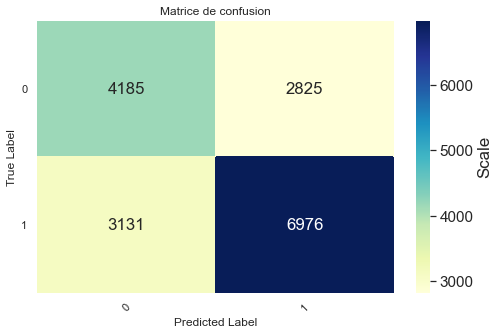

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6170415814587594
Accuracy : 0.631
Classification Report
              precision    recall  f1-score   support

           0    0.54693   0.57275   0.55954      7010
           1    0.69364   0.67092   0.68209     10107

    accuracy                        0.63072     17117
   macro avg    0.62028   0.62184   0.62082     17117
weighted avg    0.63355   0.63072   0.63190     17117



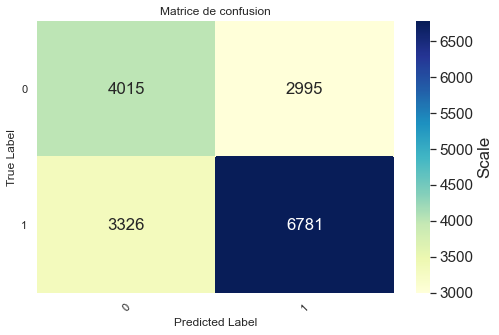

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6774369461486025
Accuracy : 0.672
Classification Report
              precision    recall  f1-score   support

           0    0.60566   0.57361   0.58920      7010
           1    0.71474   0.74097   0.72762     10107

    accuracy                        0.67243     17117
   macro avg    0.66020   0.65729   0.65841     17117
weighted avg    0.67007   0.67243   0.67093     17117



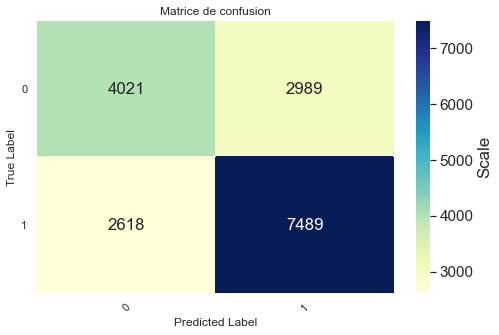

In [47]:
import numpy as np
bestScoredAlgo = []
text_normalizer=TextNormalizer() 
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer)
bestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
score=classification_avec_pretraitement(features,text_normalizer)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords"])
score=classification_avec_pretraitement(features,text_normalizer)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer)
bestScoredAlgo.append(score)

In [63]:
bestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(bestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(bestScoredAlgo)):
    print("Features :"+str(bestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(bestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(bestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(bestScoredAlgo[i][4]))
    print("-------------------------")


Meilleur score 0.7060668029993182
tri de meilleur score et meilleur algorithme de chaque features
Features :['text' 'headline' 'author' 'truthRating' 'keywords'
 'named_entities_claim']
Meilleur Score :0.7060668029993182
Meilleur Algorithm :ADB
Meilleur Parametre :{'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author']
Meilleur Score :0.7022494887525561
Meilleur Algorithm :ADB
Meilleur Parametre :{'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'truthRating']
Meilleur Score :0.7022494887525561
Meilleur Algorithm :ADB
Meilleur Parametre :{'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'author']
Meilleur Score :0.6922972051806408
Meilleur Algorithm :RFC
Meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Fe

Nous remarquons que le meilleur Algorithme est : ADB, et les meilleurs features sont 'text' 'headline' 'author' 'truthRating' 'keywords' 'named_entities_claim'

### Application du prétraitement brut

En utilisent text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6359918200408998
Accuracy : 0.637
Classification Report
              precision    recall  f1-score   support

           0    0.59542   0.35606   0.44563      7010
           1    0.65075   0.83220   0.73038     10107

    accuracy                        0.63720     17117
   macro avg    0.62309   0.59413   0.58800     17117
weighted avg    0.62809   0.63720   0.61376     17117



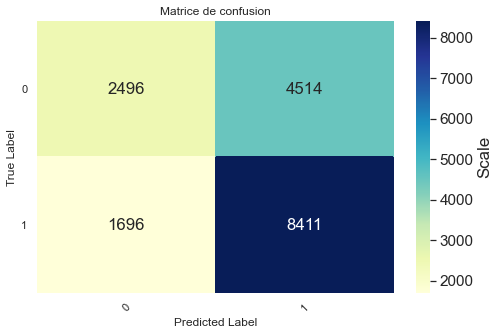

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6377641445126108
Accuracy : 0.643
Classification Report
              precision    recall  f1-score   support

           0    0.59559   0.40043   0.47889      7010
           1    0.66116   0.81142   0.72862     10107

    accuracy                        0.64310     17117
   macro avg    0.62837   0.60592   0.60375     17117
weighted avg    0.63430   0.64310   0.62635     17117



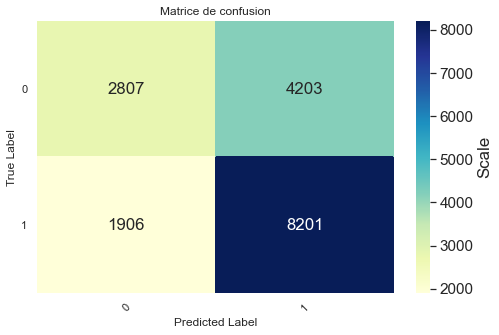

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6629856850715747
Accuracy : 0.658
Classification Report
              precision    recall  f1-score   support

           0    0.59022   0.54265   0.56544      7010
           1    0.69959   0.73870   0.71861     10107

    accuracy                        0.65841     17117
   macro avg    0.64491   0.64067   0.64203     17117
weighted avg    0.65480   0.65841   0.65588     17117



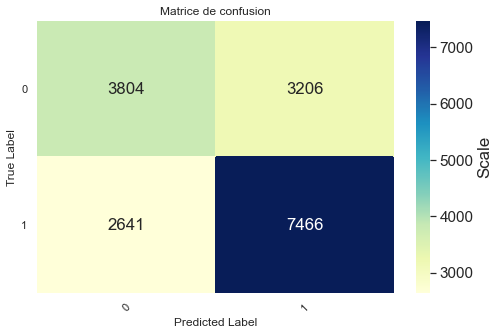

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.6196319018404908
Accuracy : 0.619
Classification Report
              precision    recall  f1-score   support

           0    0.53385   0.54337   0.53856      7010
           1    0.67932   0.67092   0.67510     10107

    accuracy                        0.61868     17117
   macro avg    0.60659   0.60714   0.60683     17117
weighted avg    0.61975   0.61868   0.61918     17117



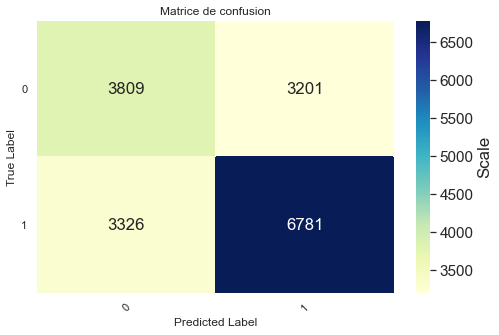

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.5989093387866394
Accuracy : 0.591
Classification Report
              precision    recall  f1-score   support

           0    0.50026   0.54108   0.51987      7010
           1    0.66261   0.62511   0.64332     10107

    accuracy                        0.59070     17117
   macro avg    0.58144   0.58310   0.58159     17117
weighted avg    0.59612   0.59070   0.59276     17117



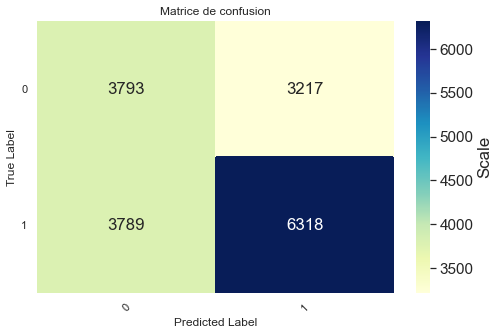

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6027266530334014
Accuracy : 0.585
Classification Report
              precision    recall  f1-score   support

           0    0.49382   0.51869   0.50595      7010
           1    0.65409   0.63125   0.64247     10107

    accuracy                        0.58515     17117
   macro avg    0.57396   0.57497   0.57421     17117
weighted avg    0.58845   0.58515   0.58656     17117



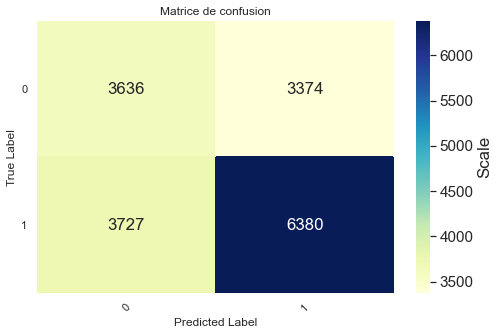

En utilisent text claims et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6812542603953646
Accuracy : 0.682
Classification Report
              precision    recall  f1-score   support

           0    0.59125   0.72140   0.64987      7010
           1    0.77195   0.65410   0.70816     10107

    accuracy                        0.68166     17117
   macro avg    0.68160   0.68775   0.67902     17117
weighted avg    0.69795   0.68166   0.68429     17117



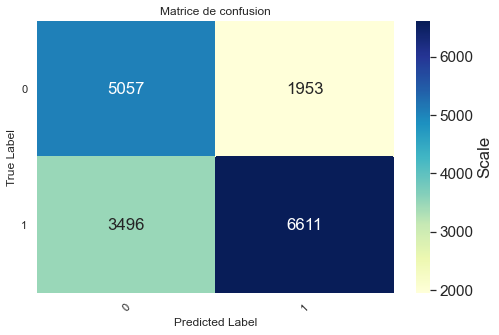

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6812542603953646
Accuracy : 0.678
Classification Report
              precision    recall  f1-score   support

           0    0.59459   0.67475   0.63214      7010
           1    0.75115   0.68091   0.71431     10107

    accuracy                        0.67839     17117
   macro avg    0.67287   0.67783   0.67322     17117
weighted avg    0.68703   0.67839   0.68066     17117



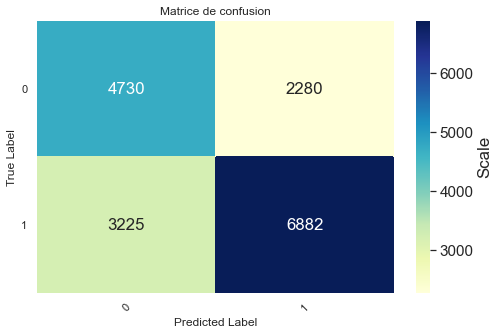

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6858895705521473
Accuracy : 0.688
Classification Report
              precision    recall  f1-score   support

           0    0.61590   0.62996   0.62285      7010
           1    0.73922   0.72752   0.73332     10107

    accuracy                        0.68756     17117
   macro avg    0.67756   0.67874   0.67808     17117
weighted avg    0.68871   0.68756   0.68808     17117



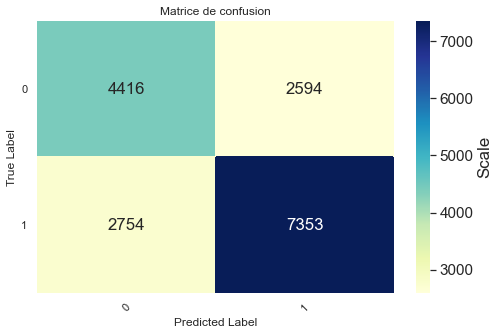

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.6483980913428766
Accuracy : 0.635
Classification Report
              precision    recall  f1-score   support

           0    0.55640   0.54180   0.54900      7010
           1    0.68788   0.70041   0.69409     10107

    accuracy                        0.63545     17117
   macro avg    0.62214   0.62110   0.62155     17117
weighted avg    0.63404   0.63545   0.63467     17117



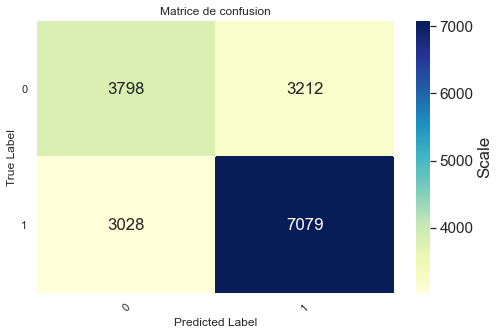

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6079072937968644
Accuracy : 0.604
Classification Report
              precision    recall  f1-score   support

           0    0.51552   0.55663   0.53529      7010
           1    0.67449   0.63718   0.65530     10107

    accuracy                        0.60419     17117
   macro avg    0.59501   0.59691   0.59530     17117
weighted avg    0.60939   0.60419   0.60615     17117



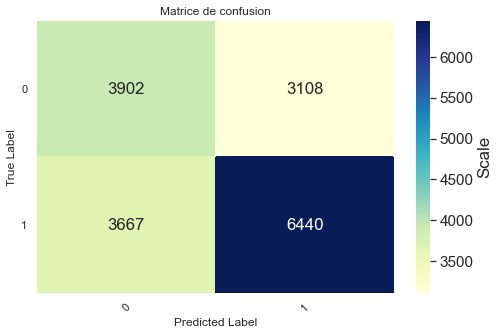

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6197682344921608
Accuracy : 0.612
Classification Report
              precision    recall  f1-score   support

           0    0.52649   0.53024   0.52836      7010
           1    0.67257   0.66924   0.67090     10107

    accuracy                        0.61232     17117
   macro avg    0.59953   0.59974   0.59963     17117
weighted avg    0.61274   0.61232   0.61252     17117



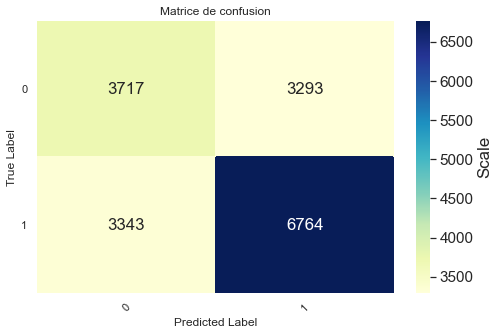

En utilisent text claims, headline et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6959781867757326
Accuracy : 0.691
Classification Report
              precision    recall  f1-score   support

           0    0.60520   0.70699   0.65215      7010
           1    0.76994   0.68012   0.72225     10107

    accuracy                        0.69113     17117
   macro avg    0.68757   0.69356   0.68720     17117
weighted avg    0.70247   0.69113   0.69354     17117



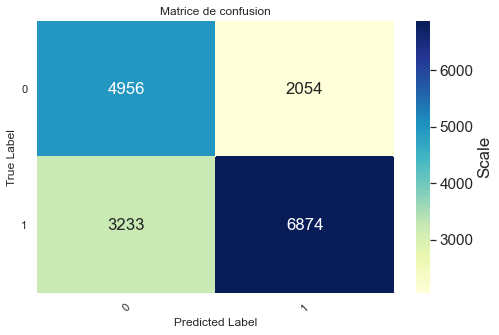

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6946148602590321
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.60829   0.70357   0.65247      7010
           1    0.76934   0.68576   0.72515     10107

    accuracy                        0.69305     17117
   macro avg    0.68881   0.69466   0.68881     17117
weighted avg    0.70338   0.69305   0.69538     17117



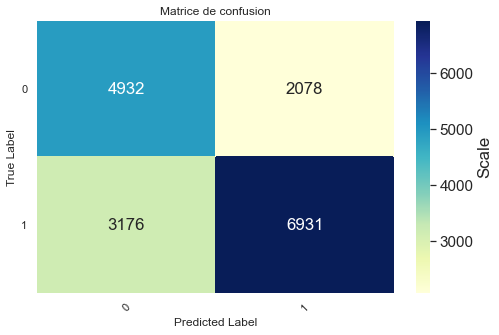

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6954328561690525
Accuracy : 0.700
Classification Report
              precision    recall  f1-score   support

           0    0.63105   0.64194   0.63645      7010
           1    0.74865   0.73969   0.74414     10107

    accuracy                        0.69966     17117
   macro avg    0.68985   0.69081   0.69029     17117
weighted avg    0.70049   0.69966   0.70004     17117



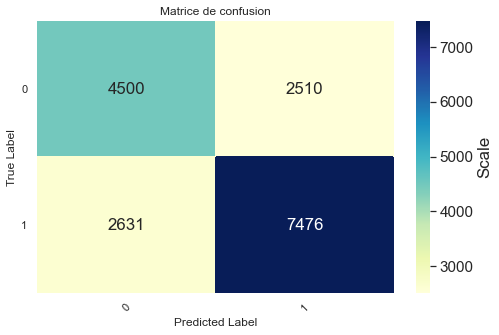

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.63640081799591
Accuracy : 0.638
Classification Report
              precision    recall  f1-score   support

           0    0.56083   0.53723   0.54878      7010
           1    0.68814   0.70822   0.69804     10107

    accuracy                        0.63820     17117
   macro avg    0.62449   0.62273   0.62341     17117
weighted avg    0.63600   0.63820   0.63691     17117



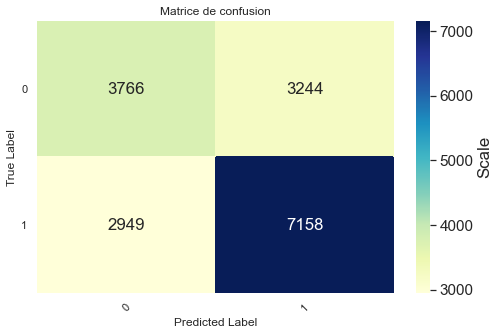

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6209952283571916
Accuracy : 0.628
Classification Report
              precision    recall  f1-score   support

           0    0.54325   0.57076   0.55666      7010
           1    0.69145   0.66716   0.67909     10107

    accuracy                        0.62768     17117
   macro avg    0.61735   0.61896   0.61787     17117
weighted avg    0.63075   0.62768   0.62895     17117



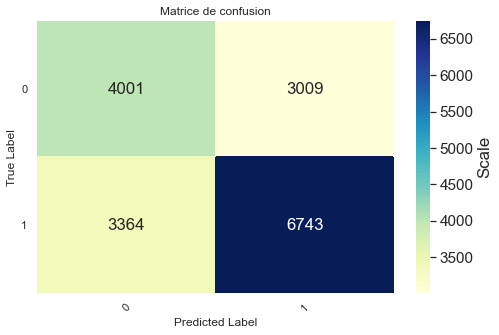

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6374914792092705
Accuracy : 0.633
Classification Report
              precision    recall  f1-score   support

           0    0.55315   0.54565   0.54937      7010
           1    0.68781   0.69427   0.69102     10107

    accuracy                        0.63341     17117
   macro avg    0.62048   0.61996   0.62020     17117
weighted avg    0.63266   0.63341   0.63301     17117



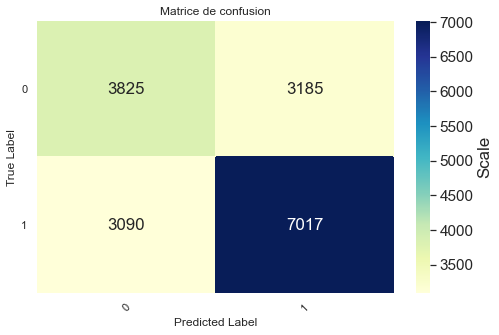

En utilisent text claims, headline, author et truthRating comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6959781867757326
Accuracy : 0.691
Classification Report
              precision    recall  f1-score   support

           0    0.60520   0.70699   0.65215      7010
           1    0.76994   0.68012   0.72225     10107

    accuracy                        0.69113     17117
   macro avg    0.68757   0.69356   0.68720     17117
weighted avg    0.70247   0.69113   0.69354     17117



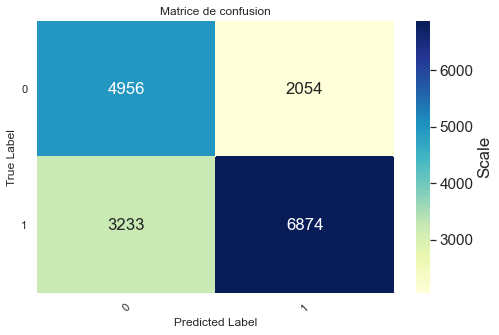

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6946148602590321
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.60829   0.70357   0.65247      7010
           1    0.76934   0.68576   0.72515     10107

    accuracy                        0.69305     17117
   macro avg    0.68881   0.69466   0.68881     17117
weighted avg    0.70338   0.69305   0.69538     17117



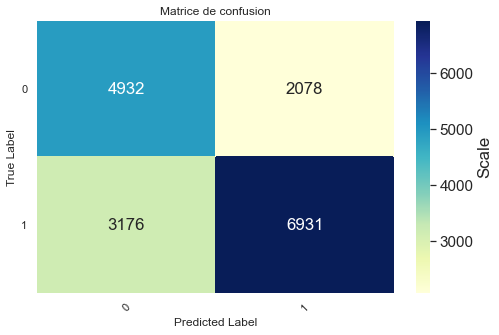

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6954328561690525
Accuracy : 0.700
Classification Report
              precision    recall  f1-score   support

           0    0.63105   0.64194   0.63645      7010
           1    0.74865   0.73969   0.74414     10107

    accuracy                        0.69966     17117
   macro avg    0.68985   0.69081   0.69029     17117
weighted avg    0.70049   0.69966   0.70004     17117



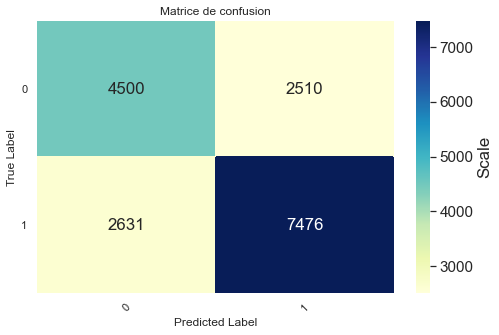

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.63640081799591
Accuracy : 0.638
Classification Report
              precision    recall  f1-score   support

           0    0.56083   0.53723   0.54878      7010
           1    0.68814   0.70822   0.69804     10107

    accuracy                        0.63820     17117
   macro avg    0.62449   0.62273   0.62341     17117
weighted avg    0.63600   0.63820   0.63691     17117



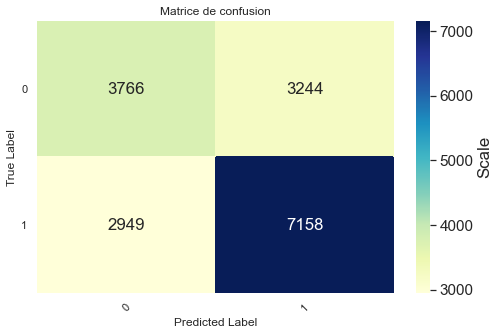

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6209952283571916
Accuracy : 0.628
Classification Report
              precision    recall  f1-score   support

           0    0.54325   0.57076   0.55666      7010
           1    0.69145   0.66716   0.67909     10107

    accuracy                        0.62768     17117
   macro avg    0.61735   0.61896   0.61787     17117
weighted avg    0.63075   0.62768   0.62895     17117



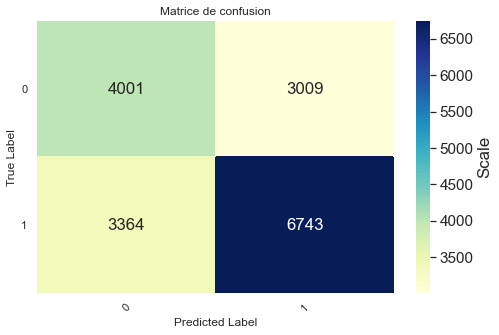

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6374914792092705
Accuracy : 0.633
Classification Report
              precision    recall  f1-score   support

           0    0.55315   0.54565   0.54937      7010
           1    0.68781   0.69427   0.69102     10107

    accuracy                        0.63341     17117
   macro avg    0.62048   0.61996   0.62020     17117
weighted avg    0.63266   0.63341   0.63301     17117



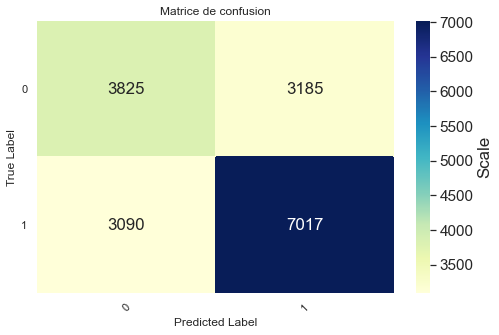

En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.700068166325835
Accuracy : 0.694
Classification Report
              precision    recall  f1-score   support

           0    0.60876   0.70984   0.65543      7010
           1    0.77256   0.68359   0.72535     10107

    accuracy                        0.69434     17117
   macro avg    0.69066   0.69671   0.69039     17117
weighted avg    0.70548   0.69434   0.69672     17117



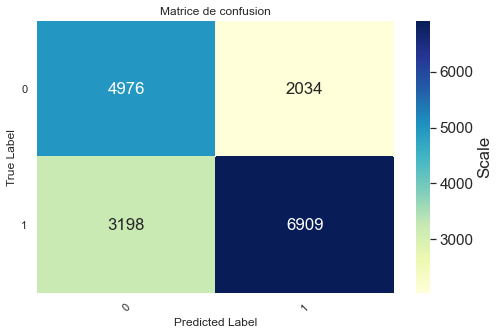

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6924335378323108
Accuracy : 0.692
Classification Report
              precision    recall  f1-score   support

           0    0.60865   0.69486   0.64890      7010
           1    0.76531   0.69012   0.72577     10107

    accuracy                        0.69206     17117
   macro avg    0.68698   0.69249   0.68734     17117
weighted avg    0.70115   0.69206   0.69429     17117



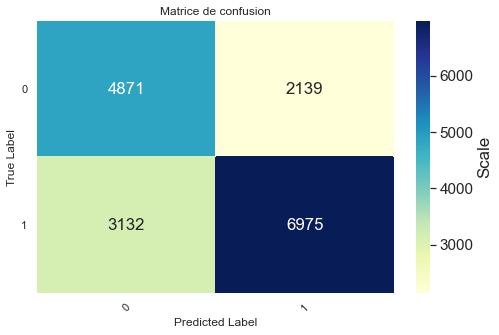

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7048398091342877
Accuracy : 0.697
Classification Report
              precision    recall  f1-score   support

           0    0.61920   0.67247   0.64474      7010
           1    0.75842   0.71317   0.73510     10107

    accuracy                        0.69650     17117
   macro avg    0.68881   0.69282   0.68992     17117
weighted avg    0.70140   0.69650   0.69809     17117



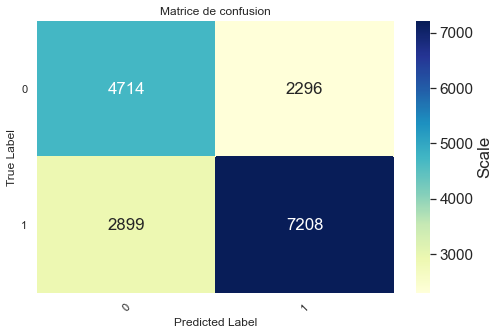

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.6453987730061349
Accuracy : 0.645
Classification Report
              precision    recall  f1-score   support

           0    0.57019   0.54351   0.55653      7010
           1    0.69334   0.71584   0.70441     10107

    accuracy                        0.64526     17117
   macro avg    0.63176   0.62967   0.63047     17117
weighted avg    0.64291   0.64526   0.64385     17117



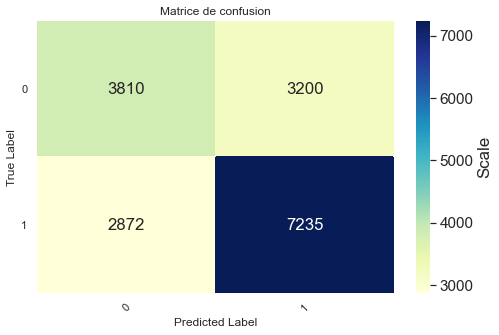

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6269938650306749
Accuracy : 0.631
Classification Report
              precision    recall  f1-score   support

           0    0.54787   0.56733   0.55743      7010
           1    0.69233   0.67527   0.68370     10107

    accuracy                        0.63107     17117
   macro avg    0.62010   0.62130   0.62056     17117
weighted avg    0.63317   0.63107   0.63199     17117



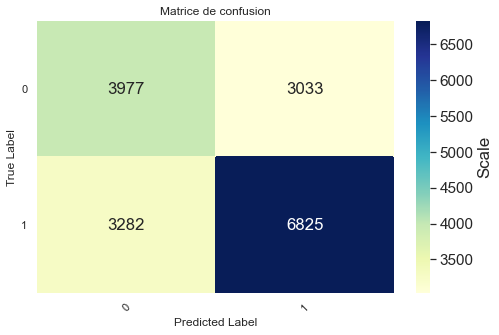

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6449897750511248
Accuracy : 0.641
Classification Report
              precision    recall  f1-score   support

           0    0.56298   0.55535   0.55914      7010
           1    0.69447   0.70100   0.69772     10107

    accuracy                        0.64135     17117
   macro avg    0.62873   0.62817   0.62843     17117
weighted avg    0.64062   0.64135   0.64097     17117



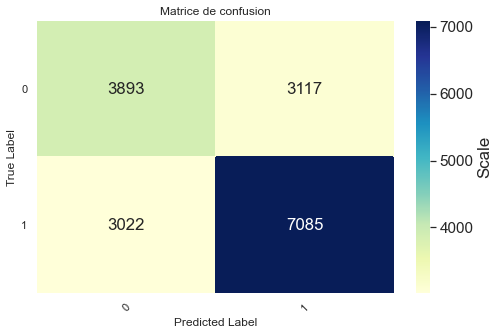

En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6970688479890934
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.60709   0.71127   0.65506      7010
           1    0.77269   0.68072   0.72379     10107

    accuracy                        0.69323     17117
   macro avg    0.68989   0.69599   0.68943     17117
weighted avg    0.70487   0.69323   0.69564     17117



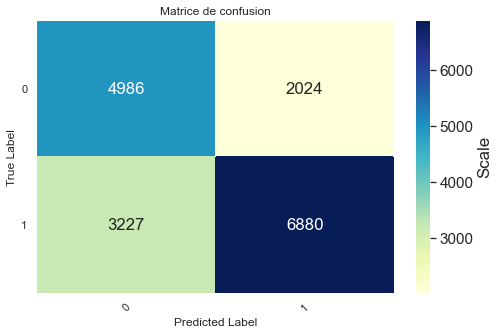

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6906612133605999
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.61936   0.65991   0.63899      7010
           1    0.75290   0.71871   0.73541     10107

    accuracy                        0.69463     17117
   macro avg    0.68613   0.68931   0.68720     17117
weighted avg    0.69821   0.69463   0.69592     17117



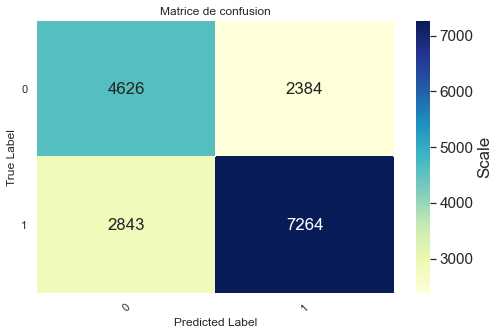

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.705385139740968
Accuracy : 0.699
Classification Report
              precision    recall  f1-score   support

           0    0.62450   0.66548   0.64434      7010
           1    0.75692   0.72247   0.73929     10107

    accuracy                        0.69913     17117
   macro avg    0.69071   0.69397   0.69182     17117
weighted avg    0.70269   0.69913   0.70041     17117



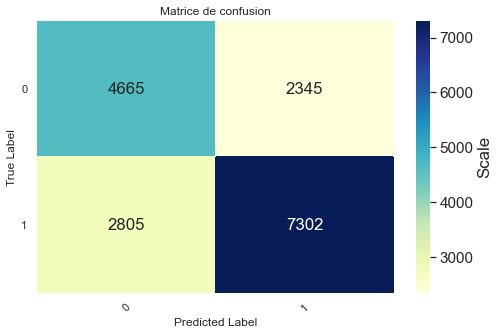

Alogrithm: KNC
best params: {'clf__leaf_size': 15, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
best scores: 0.643626448534424
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.56556   0.58573   0.57547      7010
           1    0.70539   0.68794   0.69655     10107

    accuracy                        0.64608     17117
   macro avg    0.63548   0.63684   0.63601     17117
weighted avg    0.64812   0.64608   0.64697     17117



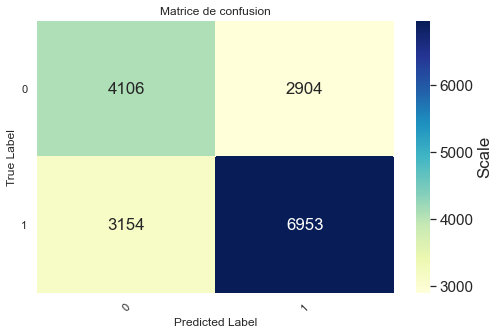

Alogrithm: SVC
best params: {'clf__C': 100, 'clf__kernel': 'sigmoid', 'clf__tol': 0.01}
best scores: 0.6250852079072938
Accuracy : 0.627
Classification Report
              precision    recall  f1-score   support

           0    0.54371   0.56163   0.55252      7010
           1    0.68884   0.67310   0.68088     10107

    accuracy                        0.62745     17117
   macro avg    0.61628   0.61736   0.61670     17117
weighted avg    0.62941   0.62745   0.62831     17117



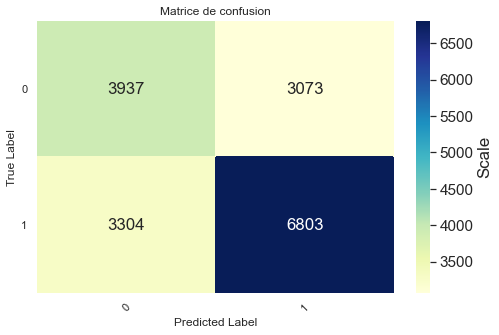

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.65439672801636
Accuracy : 0.654
Classification Report
              precision    recall  f1-score   support

           0    0.57958   0.56776   0.57361      7010
           1    0.70439   0.71436   0.70934     10107

    accuracy                        0.65432     17117
   macro avg    0.64199   0.64106   0.64147     17117
weighted avg    0.65328   0.65432   0.65375     17117



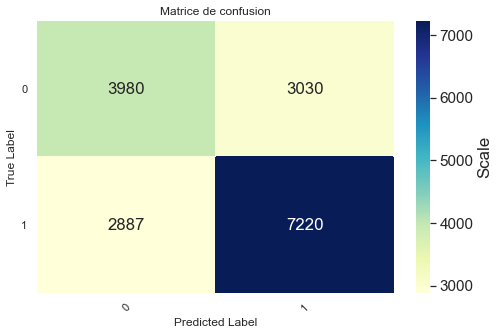

In [65]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=True, # supprimer les nombres 
                 transformdigit=True, # transforamation des chiffre en lettres
                 getstemmer=True,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=True # supprimer les caractéres non ascii
                 )
brut_bestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer)
brut_bestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer)
brut_bestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer)
brut_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
score=classification_avec_pretraitement(features,text_normalizer)
brut_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords"])
score=classification_avec_pretraitement(features,text_normalizer)
brut_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer)
brut_bestScoredAlgo.append(score)

In [66]:
brut_bestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(brut_bestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(brut_bestScoredAlgo)):
    print("Features :"+str(brut_bestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(brut_bestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(brut_bestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(brut_bestScoredAlgo[i][4]))
    print("-------------------------")

Meilleur score 0.705385139740968
tri de meilleur score et meilleur algorithme de chaque features
Features :['text' 'headline' 'author' 'truthRating' 'keywords'
 'named_entities_claim']
Meilleur Score :0.705385139740968
Meilleur Algorithm :RFC
Meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'truthRating' 'keywords']
Meilleur Score :0.7048398091342877
Meilleur Algorithm :RFC
Meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author']
Meilleur Score :0.6959781867757326
Meilleur Algorithm :ADB
Meilleur Parametre :{'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'truthRating']
Meilleur Score :0.6959781867757326
Meilleur Algorithm :ADB
Meilleur Par

### Application du prétraitement lower case et remove stop words

In [ ]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
lowerStop_bestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStop_bestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStop_bestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStop_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStop_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStop_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStop_bestScoredAlgo.append(score)

In [ ]:
lowerStop_bestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(lowerStop_bestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(lowerStop_bestScoredAlgo)):
    print("Features :"+str(lowerStop_bestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(lowerStop_bestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(lowerStop_bestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(lowerStop_bestScoredAlgo[i][4]))
    print("-------------------------")

### Application du prétraitement lower case et remove stop words et lemmatisation

In [ ]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
lowerStopLemma_bestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)

In [ ]:
lowerStopLemma_bestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(lowerStopLemma_bestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(lowerStopLemma_bestScoredAlgo)):
    print("Features :"+str(lowerStopLemma_bestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(lowerStopLemma_bestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(lowerStopLemma_bestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(lowerStopLemma_bestScoredAlgo[i][4]))
    print("-------------------------")

### Application du prétraitement lower case et remove stop words et lemmatisation et transformation des digit en lettre

In [ ]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=True, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii)
lowerStopLemma_bestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et truthRating comme jeu de donnée")
features = np.array(["text","headline","author","truthRating","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer)
lowerStopLemma_bestScoredAlgo.append(score)

In [ ]:
lowerStopLemma_bestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(lowerStopLemma_bestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(lowerStopLemma_bestScoredAlgo)):
    print("Features :"+str(lowerStopLemma_bestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(lowerStopLemma_bestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(lowerStopLemma_bestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(lowerStopLemma_bestScoredAlgo[i][4]))
    print("-------------------------")

# Equilibrage des données

## Random under-sampling

# Tache 3 : VRAIS / FAUX / MIXTURE